# Importing Dataset from UCI Machine Learning Repository

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetching dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# creating pandas dataframes
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# printing metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# printing variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

# Data Preprocessing

We notice that majority of the features are categorical in nature and dataset has missing values for several columns. Hence, we'll have to deal with missing values during the data preprocessing step.

In [3]:
# Previewing features
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
X.head()

race  gender      age weight  admission_type_id  \
0        Caucasian  Female   [0-10)    NaN                  6   
1        Caucasian  Female  [10-20)    NaN                  1   
2  AfricanAmerican  Female  [20-30)    NaN                  1   
3        Caucasian    Male  [30-40)    NaN                  1   
4        Caucasian    Male  [40-50)    NaN                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   
2                         1                    7                 2        NaN   
3                         1                    7                 2        NaN   
4                         1                    7                 1        NaN   

          medical_specialty  num_lab_procedures  num_procedures  \
0  Pediatrics-Endocrinology                  41               0   
1                       NaN                  59               0   
2                       NaN                  11               5   
3                       NaN                  44               1   
4                       NaN                  51               0   

   num_medications  number_outpatient  number_emergency  number_inpatient  \
0                1                  0                 0                 0   
1               18                  0                 0                 0   
2               13                  2                 0                 1   
3               16                  0                 0                 0   
4                8                  0                 0                 0   

   diag_1  diag_2 diag_3  number_diagnoses max_glu_serum A1Cresult metformin  \
0  250.83     NaN    NaN                 1          None      None        No   
1     276  250.01    255                 9          None      None        No   
2     648     250    V27                 6          None      None        No   
3       8  250.43    403                 7          None      None        No   
4     197     157    250                 5          None      None        No   

  repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide  \
0          No          No             No          No            No        No   
1          No          No             No          No            No        No   
2          No          No             No          No            No    Steady   
3          No          No             No          No            No        No   
4          No          No             No          No            No    Steady   

  glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol  \
0        No          No           No            No       No       No   
1        No          No           No            No       No       No   
2        No          No           No            No       No       No   
3        No          No           No            No       No       No   
4        No          No           No            No       No       No   

  troglitazone tolazamide examide citoglipton insulin glyburide-metformin  \
0           No         No      No          No      No                  No   
1           No         No      No          No      Up                  No   
2           No         No      No          No      No                  No   
3           No         No      No          No      Up                  No   
4           No         No      No          No  Steady                  No   

  glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                  No                       No                      No   
1                  No                       No                      No   
2                  No                       No                      No   
3                  No                       No                      No   
4                  No                     

In [4]:
# Previewing data types
X.dtypes

race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

In [5]:
# Previewing target variable
y.head()

readmitted
0         NO
1        >30
2         NO
3         NO
4         NO

In [6]:
y.dtypes

readmitted    object
dtype: object

In [7]:
# Combining X and y to create a df
df = pd.concat([X, y], axis=1)
df.head()

race  gender      age weight  admission_type_id  \
0        Caucasian  Female   [0-10)    NaN                  6   
1        Caucasian  Female  [10-20)    NaN                  1   
2  AfricanAmerican  Female  [20-30)    NaN                  1   
3        Caucasian    Male  [30-40)    NaN                  1   
4        Caucasian    Male  [40-50)    NaN                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   
2                         1                    7                 2        NaN   
3                         1                    7                 2        NaN   
4                         1                    7                 1        NaN   

          medical_specialty  num_lab_procedures  num_procedures  \
0  Pediatrics-Endocrinology                  41               0   
1                       NaN                  59               0   
2                       NaN                  11               5   
3                       NaN                  44               1   
4                       NaN                  51               0   

   num_medications  number_outpatient  number_emergency  number_inpatient  \
0                1                  0                 0                 0   
1               18                  0                 0                 0   
2               13                  2                 0                 1   
3               16                  0                 0                 0   
4                8                  0                 0                 0   

   diag_1  diag_2 diag_3  number_diagnoses max_glu_serum A1Cresult metformin  \
0  250.83     NaN    NaN                 1          None      None        No   
1     276  250.01    255                 9          None      None        No   
2     648     250    V27                 6          None      None        No   
3       8  250.43    403                 7          None      None        No   
4     197     157    250                 5          None      None        No   

  repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide  \
0          No          No             No          No            No        No   
1          No          No             No          No            No        No   
2          No          No             No          No            No    Steady   
3          No          No             No          No            No        No   
4          No          No             No          No            No    Steady   

  glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol  \
0        No          No           No            No       No       No   
1        No          No           No            No       No       No   
2        No          No           No            No       No       No   
3        No          No           No            No       No       No   
4        No          No           No            No       No       No   

  troglitazone tolazamide examide citoglipton insulin glyburide-metformin  \
0           No         No      No          No      No                  No   
1           No         No      No          No      Up                  No   
2           No         No      No          No      No                  No   
3           No         No      No          No      Up                  No   
4           No         No      No          No  Steady                  No   

  glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                  No                       No                      No   
1                  No                       No                      No   
2                  No                       No                      No   
3                  No                       No                      No   
4                  No                     

In [8]:
# Creating a copy of the df to work with - This is so we don't make changes to the original df
df_copy = df.copy(deep=True)
df_copy.head()

race  gender      age weight  admission_type_id  \
0        Caucasian  Female   [0-10)    NaN                  6   
1        Caucasian  Female  [10-20)    NaN                  1   
2  AfricanAmerican  Female  [20-30)    NaN                  1   
3        Caucasian    Male  [30-40)    NaN                  1   
4        Caucasian    Male  [40-50)    NaN                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   
2                         1                    7                 2        NaN   
3                         1                    7                 2        NaN   
4                         1                    7                 1        NaN   

          medical_specialty  num_lab_procedures  num_procedures  \
0  Pediatrics-Endocrinology                  41               0   
1                       NaN                  59               0   
2                       NaN                  11               5   
3                       NaN                  44               1   
4                       NaN                  51               0   

   num_medications  number_outpatient  number_emergency  number_inpatient  \
0                1                  0                 0                 0   
1               18                  0                 0                 0   
2               13                  2                 0                 1   
3               16                  0                 0                 0   
4                8                  0                 0                 0   

   diag_1  diag_2 diag_3  number_diagnoses max_glu_serum A1Cresult metformin  \
0  250.83     NaN    NaN                 1          None      None        No   
1     276  250.01    255                 9          None      None        No   
2     648     250    V27                 6          None      None        No   
3       8  250.43    403                 7          None      None        No   
4     197     157    250                 5          None      None        No   

  repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide  \
0          No          No             No          No            No        No   
1          No          No             No          No            No        No   
2          No          No             No          No            No    Steady   
3          No          No             No          No            No        No   
4          No          No             No          No            No    Steady   

  glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol  \
0        No          No           No            No       No       No   
1        No          No           No            No       No       No   
2        No          No           No            No       No       No   
3        No          No           No            No       No       No   
4        No          No           No            No       No       No   

  troglitazone tolazamide examide citoglipton insulin glyburide-metformin  \
0           No         No      No          No      No                  No   
1           No         No      No          No      Up                  No   
2           No         No      No          No      No                  No   
3           No         No      No          No      Up                  No   
4           No         No      No          No  Steady                  No   

  glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                  No                       No                      No   
1                  No                       No                      No   
2                  No                       No                      No   
3                  No                       No                      No   
4                  No                     

In [9]:
df_copy.shape
# We have 48 columns (47 features and 1 target) and 101.7k records/rows

(101766, 48)

## Dealing with missing values

We have missing values in the following columns:
1. Race
2. Weight
3. Payer Code
4. Medical Specialty
5. diag_1, diag_2, and diag_3

*   Amongst these, we see that weight has 96.86% nulls
*   Payer code has around 40% null values and from domain knowledge, we know that method of payment doesn't impact the readmission variable
*   Similarly, the medical speciality has around 50% null values and the admitting physician's speciality might not help determine the readmission variable - as a series of tests are a better indicator. Additionally, we can't impute nulls with a random speciality

Hence we can drop these columns as they're not useful in predicting target variable due to unavailable info and domain knowledge.

In [10]:
# Checking % of nulls in each column
(df_copy.isnull().mean() * 100).round(2)

race                         2.23
gender                       0.00
age                          0.00
weight                      96.86
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide                0.00
glipizide                    0.00
glyburide     

In [11]:
# Dropping weight, medical speciality and payer code from the df
columns_to_drop = ['weight', 'payer_code', 'medical_specialty']
df_copy = df_copy.drop(columns=columns_to_drop)
df_copy.head()

race  gender      age  admission_type_id  \
0        Caucasian  Female   [0-10)                  6   
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

   num_lab_procedures  num_procedures  num_medications  number_outpatient  \
0                  41               0                1                  0   
1                  59               0               18                  0   
2                  11               5               13                  2   
3                  44               1               16                  0   
4                  51               0                8                  0   

   number_emergency  number_inpatient  diag_1  diag_2 diag_3  \
0                 0                 0  250.83     NaN    NaN   
1                 0                 0     276  250.01    255   
2                 0                 1     648     250    V27   
3                 0                 0       8  250.43    403   
4                 0                 0     197     157    250   

   number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide  \
0                 1          None      None        No          No          No   
1                 9          None      None        No          No          No   
2                 6          None      None        No          No          No   
3                 7          None      None        No          No          No   
4                 5          None      None        No          No          No   

  chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide  \
0             No          No            No        No        No          No   
1             No          No            No        No        No          No   
2             No          No            No    Steady        No          No   
3             No          No            No        No        No          No   
4             No          No            No    Steady        No          No   

  pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide  \
0           No            No       No       No           No         No   
1           No            No       No       No           No         No   
2           No            No       No       No           No         No   
3           No            No       No       No           No         No   
4           No            No       No       No           No         No   

  examide citoglipton insulin glyburide-metformin glipizide-metformin  \
0      No          No      No                  No                  No   
1      No          No      Up                  No                  No   
2      No          No      No                  No                  No   
3      No          No      Up                  No                  No   
4      No          No  Steady                  No                  No   

  glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone  \
0                       No                      No                     No   
1                       No                      No                     No   
2                       No                      No                     No   
3                       No                      No                     No   
4                       No                      No                     No   

  change diabetesMed readmitted  
0     No          No         NO  
1     Ch         Yes     

In [12]:
# For race, we see 2.23% null values. Imputing the missing values with mode, though an option, wouldn't be the best approach as we're dealing with medical data and
# in case this column affects target variable, we could end up misclassifying due to imputation. Instead we can replace nulls with 'Unknown' category.

df_copy['race'].fillna('Unknown', inplace=True)

For diag_1, diag_2, and diag_3,the first 3 digits of ICD9 corresponding to primary, secondary, and additional secondary diagnosis. These three digits provide a general classification of the disease or condition, indicating the broad group to which the specific code belongs.

For example, in the ICD-9 code 401.0, the first three digits "401" represent the category for "Essential hypertension." The digits "401" broadly classify the condition as essential hypertension. Codes starting with "V" (V01-V91) are used for external causes of morbidity and mortality.

These codes often describe the cause or intent of an injury, such as a motor vehicle accident or a fall. Codes starting with "E" (E000-E999) are used for supplementary classification of external causes of injury and poisoning. These codes provide details about how an injury occurred.

The meaning of null values (missing data) in the context of ICD-9 codes or any other medical coding system depends on the specific use case and the nature of the data. Here are some common interpretations:

1. **Data Not Recorded or Available:** Null values in ICD-9 codes might indicate that the specific diagnosis or condition was not recorded for a particular patient or encounter. It could also mean that the information is not available in the dataset for some other reason.

2. **Unknown Diagnosis or Condition:** In some cases, null values might indicate that the patient's diagnosis or condition is unknown. This could happen when a patient's health information is incomplete or when the medical professional was unable to determine a specific diagnosis.

3. **Non-Applicable or Not Appropriate:** Null values might be used to signify that a particular diagnosis or condition is not applicable in a given context. For example, certain ICD-9 codes might not be relevant for certain patient populations or medical encounters.

4. **Data Entry Errors:** Null values can sometimes be the result of data entry errors or issues with data collection. It's important to consider the quality and completeness of the data when interpreting null values.

5. **Privacy or Confidentiality Concerns:** In some cases, null values might be intentionally used to mask or hide specific health information due to privacy or confidentiality concerns.

In [13]:
# Due to the lack of knowledge on why we see nulls in these columns, let's see the impact of dropping records with null values in these columns

In [14]:
# Checking impact of removing rows with nulls when diag_1, diag_2, diag_3 are null

null_diag_subset = df_copy[df_copy['diag_1'].isnull()]
null_diag_subset
readmitted_percentage = (null_diag_subset['readmitted'].value_counts(normalize=True) * 100).round(2)
readmitted_percentage

NO     57.14
<30    23.81
>30    19.05
Name: readmitted, dtype: float64

In [15]:
null_diag_subset = df_copy[df_copy['diag_2'].isnull()]
null_diag_subset
readmitted_percentage = (null_diag_subset['readmitted'].value_counts(normalize=True) * 100).round(2)
readmitted_percentage

NO     71.23
>30    20.67
<30     8.10
Name: readmitted, dtype: float64

In [16]:
null_diag_subset = df_copy[df_copy['diag_3'].isnull()]
null_diag_subset
readmitted_percentage = (null_diag_subset['readmitted'].value_counts(normalize=True) * 100).round(2)
readmitted_percentage

NO     69.85
>30    23.75
<30     6.39
Name: readmitted, dtype: float64

In [17]:
df_after_removing_diag_nulls = df_copy.dropna(subset=['diag_1', 'diag_2', 'diag_3'])
df_after_removing_diag_nulls.shape

(100244, 45)

In [18]:
df_copy.shape[0]

101766

In [19]:
(df_after_removing_diag_nulls['readmitted'].value_counts(normalize=True) * 100).round(2)

NO     53.69
>30    35.09
<30    11.22
Name: readmitted, dtype: float64

In [20]:
(df_copy['readmitted'].value_counts(normalize=True) * 100).round(2)
# We see that the proportion of readmitted values is more or less same before and after removing nulls from diag columns

NO     53.91
>30    34.93
<30    11.16
Name: readmitted, dtype: float64

In [21]:
print(round(df_after_removing_diag_nulls.shape[0]*100/df_copy.shape[0],2),"%")
# We see that by dropping rows with nulls, we retain 98.5% of data

98.5 %


As we don't lose much information, we can proceed by dropping records where diag_1, diag_2, or diag_3 are null

In [22]:
df_copy = df_copy.dropna(subset=['diag_1', 'diag_2', 'diag_3'])
df_copy.shape

(100244, 45)

## Creating binary categories for target variable

In [23]:
# Replacing NO with 0 and >30 and <30 with 1
df_copy['readmitted'] = df_copy['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})
df_copy.head()

<ipython-input-23-69a8d410ca42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['readmitted'] = df_copy['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})


race  gender      age  admission_type_id  \
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   
5        Caucasian    Male  [50-60)                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   
5                         1                    2                 3   

   num_lab_procedures  num_procedures  num_medications  number_outpatient  \
1                  59               0               18                  0   
2                  11               5               13                  2   
3                  44               1               16                  0   
4                  51               0                8                  0   
5                  31               6               16                  0   

   number_emergency  number_inpatient diag_1  diag_2 diag_3  number_diagnoses  \
1                 0                 0    276  250.01    255                 9   
2                 0                 1    648     250    V27                 6   
3                 0                 0      8  250.43    403                 7   
4                 0                 0    197     157    250                 5   
5                 0                 0    414     411    250                 9   

  max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide  \
1          None      None        No          No          No             No   
2          None      None        No          No          No             No   
3          None      None        No          No          No             No   
4          None      None        No          No          No             No   
5          None      None        No          No          No             No   

  glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone  \
1          No            No        No        No          No           No   
2          No            No    Steady        No          No           No   
3          No            No        No        No          No           No   
4          No            No    Steady        No          No           No   
5          No            No        No        No          No           No   

  rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton  \
1            No       No       No           No         No      No          No   
2            No       No       No           No         No      No          No   
3            No       No       No           No         No      No          No   
4            No       No       No           No         No      No          No   
5            No       No       No           No         No      No          No   

  insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
1      Up                  No                  No                       No   
2      No                  No                  No                       No   
3      Up                  No                  No                       No   
4  Steady                  No                  No                       No   
5  Steady                  No                  No                       No   

  metformin-rosiglitazone metformin-pioglitazone change diabetesMed  \
1                      No                     No     Ch         Yes   
2                      No                     No     No         Yes   
3                      No                     No     Ch         Yes   
4                      No                     No     Ch         Yes   
5                      No                     No     No  

In [24]:
(df_copy['readmitted'].value_counts(normalize=True) * 100).round(2)
# The dataset seems balanced as well

0    53.69
1    46.31
Name: readmitted, dtype: float64

## Fixing data types

In [25]:
df_copy.dtypes
# We know that admission_type_id, discharge_disposition_id, admission_source_id are categorical in nature - each int value stands
# for something as seen in the data dictionary

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

In [26]:
# converting this to string
columns_to_convert = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
df_copy[columns_to_convert] = df_copy[columns_to_convert].astype(str)
df_copy.dtypes

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

# EDA & Feature Selection/Transformation

## For numerical columns - General understanding of independence and distributions

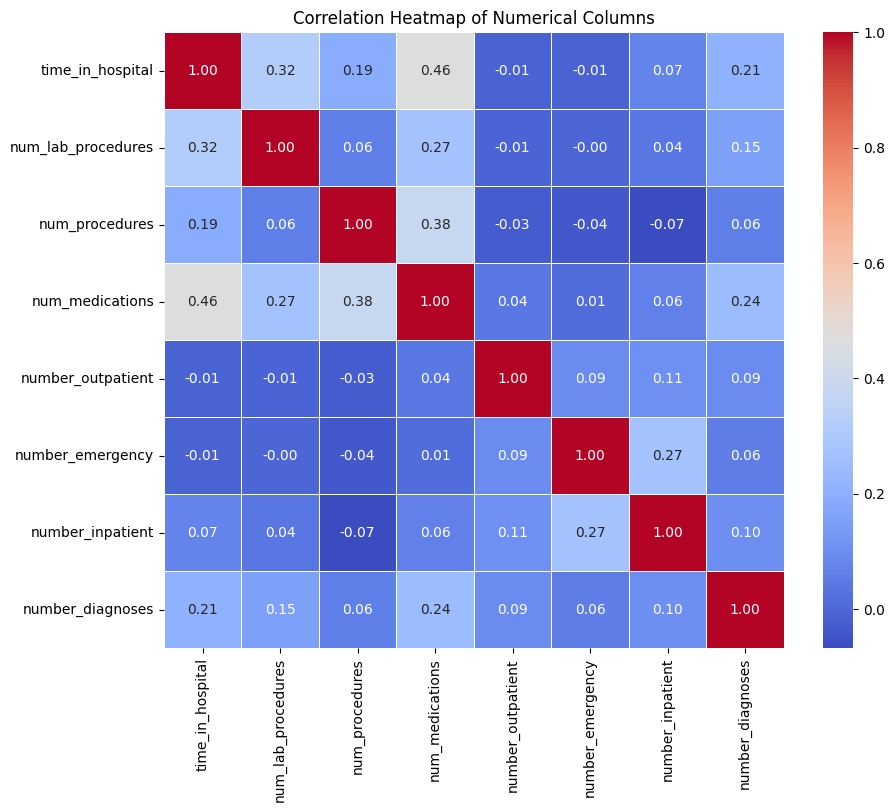

In [27]:
### Checking correlation between numeric variables
import seaborn as sns
import matplotlib.pyplot as plt

# Getting list of numerical columns from the df
numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
df_numerical = df_copy[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = df_numerical.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

We see that the numerical columns have negligible correlation between then and can be considered to be independent variables

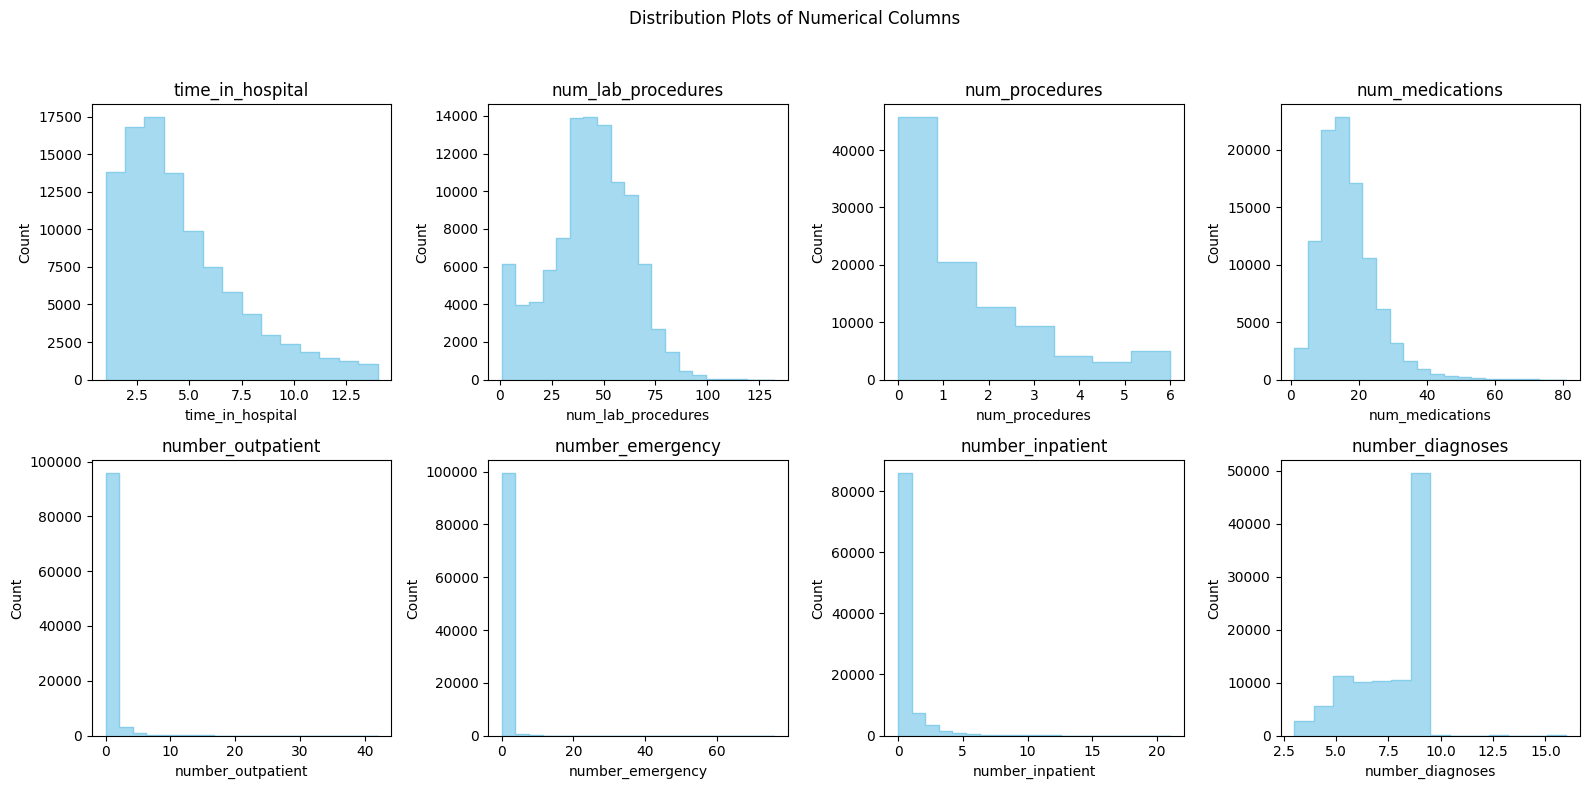

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Distribution Plots of Numerical Columns")

# Plotting individual distribution plots for each column
for i, col in enumerate(numerical_columns):
    unique_values = df_copy[col].unique()
    bins = len(unique_values) if len(unique_values) < 20 else 20  # Limiting bins for better visualization
    sns.histplot(df_copy[col], bins=bins, kde=False, ax=axes.flatten()[i], color='skyblue', element='step')
    axes.flatten()[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

We see that the following numerical columns appear to have a **normal/gaussian** distribution: num_lab_procedures, num_medications

We see that the following numerical columns appear to have a **left skewed** distribution: num_procedures, number_outpatient, number_emergency, number_inpatient, number_diagnoses

We see that the following numerical columns appear to have a **right skewed** distribution: number_diagnoses

However, there seem to be many extreme values and we need to confirm the distribution using other techniques - such as QQ plot

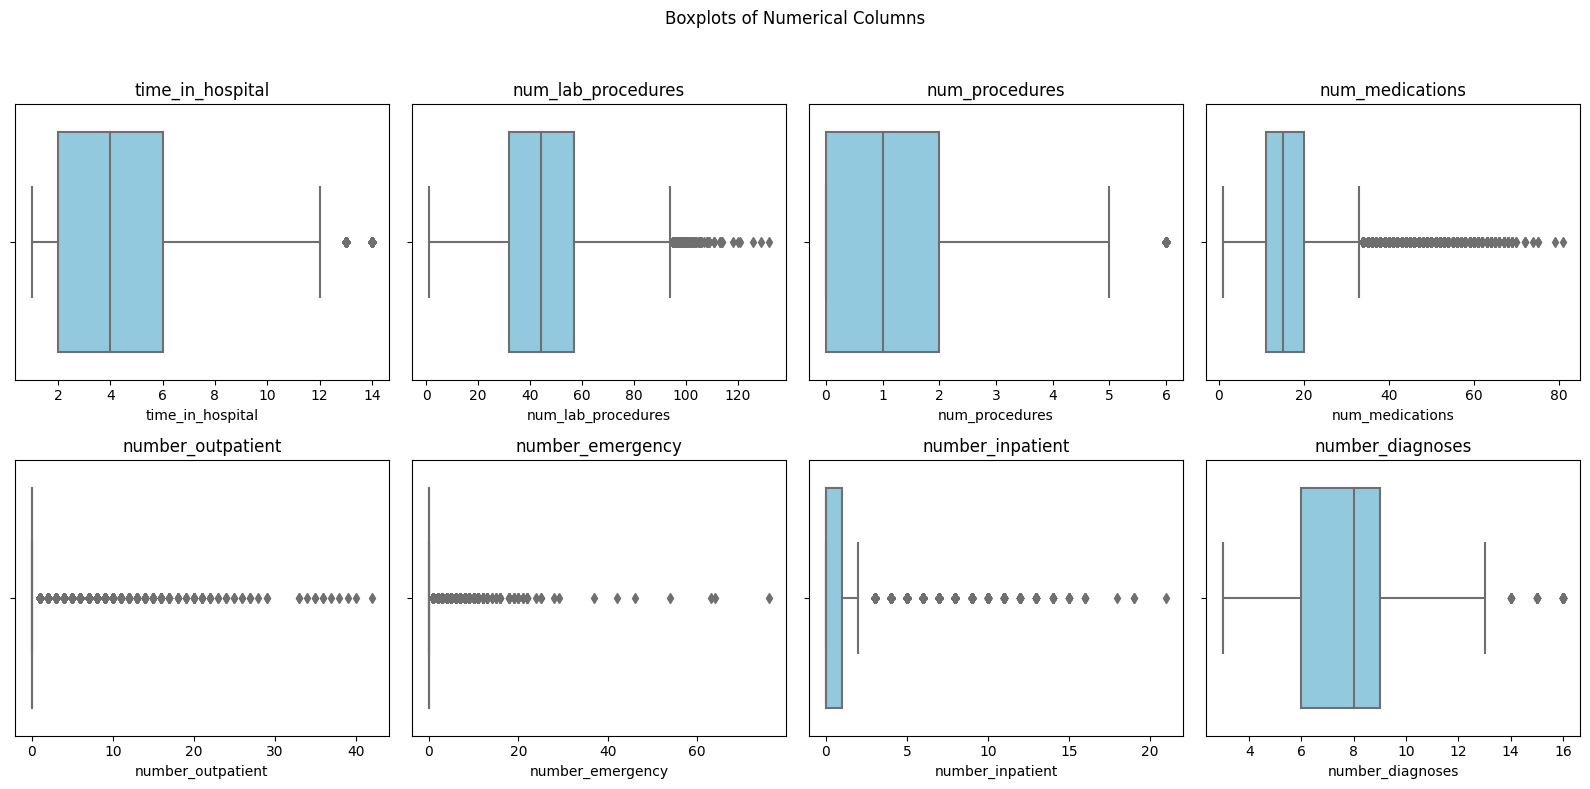

In [29]:
# Plotting boxplots to understand how data is spread by quartiles and to detect outliers
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Boxplots of Numerical Columns")

# Plotting individual boxplots for each column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_copy[col], ax=axes.flatten()[i], color='skyblue')
    axes.flatten()[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

We see that num_medications, number_outpatient, number_emergency and number_inpatient have many outliers. Hence we need to find a way to check the distribution as most outliers fall in the tail of the gaussian distribution

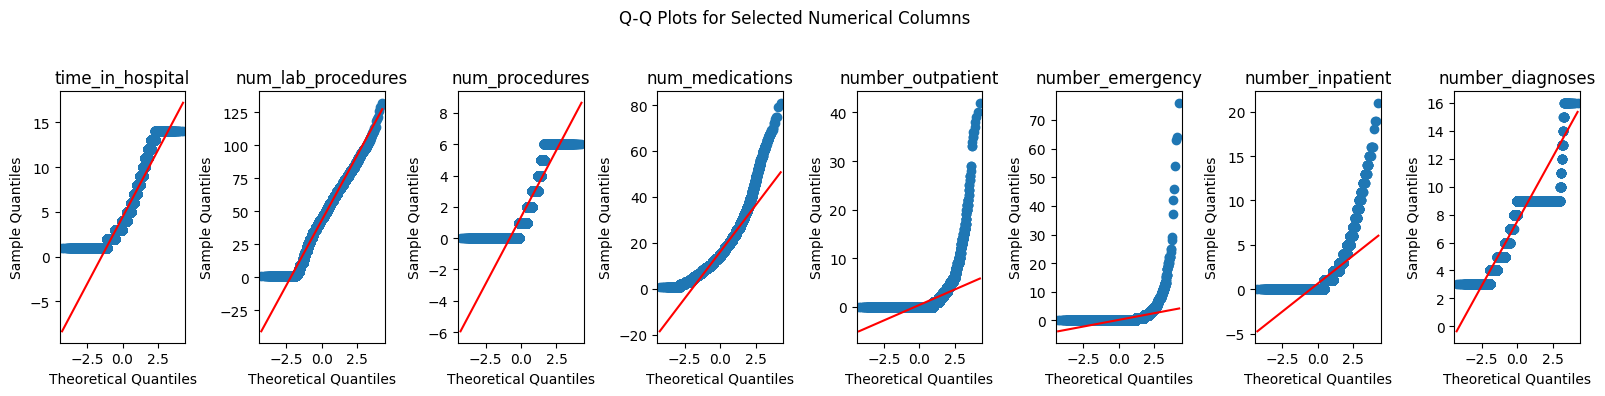

In [30]:
# Plotting Q-Q plot to understand the distributions better and evaluate if they're gaussian
import statsmodels.api as sm
import matplotlib.pyplot as plt

columns_to_plot = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Set up a single row of plots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(16, 4))
fig.suptitle("Q-Q Plots for Selected Numerical Columns")

# Plot individual Q-Q plots for each column
for i, col in enumerate(columns_to_plot):
    sm.qqplot(df_copy[col], line='s', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Here we see that the following columns are mostly in line with the theoritical line (ignoring the tails) indicating that it has a gaussian distribution: time_in_hospital, num_lab_procedures, num_procedures, number_diagnoses (though this can be improved)

num_medications, number_outpatient, number_emergency and number_inpatient have many outliers and as a result, don't seem to follow a gaussian distribution. We need to transform them so it follows a gaussian distribution (In order to apply several models like NB)

In [31]:
import pandas as pd
import numpy as np

# Replace 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient'
# with the actual column names in your DataFrame
columns_to_transform = ['num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']

for column in columns_to_transform:
    # Adding a small constant to avoid issues with zero values
    df_copy[column + '_log'] = np.log1p(df_copy[column])

# Display the transformed DataFrame
df_copy.head()

race  gender      age admission_type_id  \
1        Caucasian  Female  [10-20)                 1   
2  AfricanAmerican  Female  [20-30)                 1   
3        Caucasian    Male  [30-40)                 1   
4        Caucasian    Male  [40-50)                 1   
5        Caucasian    Male  [50-60)                 2   

  discharge_disposition_id admission_source_id  time_in_hospital  \
1                        1                   7                 3   
2                        1                   7                 2   
3                        1                   7                 2   
4                        1                   7                 1   
5                        1                   2                 3   

   num_lab_procedures  num_procedures  num_medications  number_outpatient  \
1                  59               0               18                  0   
2                  11               5               13                  2   
3                  44               1               16                  0   
4                  51               0                8                  0   
5                  31               6               16                  0   

   number_emergency  number_inpatient diag_1  diag_2 diag_3  number_diagnoses  \
1                 0                 0    276  250.01    255                 9   
2                 0                 1    648     250    V27                 6   
3                 0                 0      8  250.43    403                 7   
4                 0                 0    197     157    250                 5   
5                 0                 0    414     411    250                 9   

  max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide  \
1          None      None        No          No          No             No   
2          None      None        No          No          No             No   
3          None      None        No          No          No             No   
4          None      None        No          No          No             No   
5          None      None        No          No          No             No   

  glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone  \
1          No            No        No        No          No           No   
2          No            No    Steady        No          No           No   
3          No            No        No        No          No           No   
4          No            No    Steady        No          No           No   
5          No            No        No        No          No           No   

  rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton  \
1            No       No       No           No         No      No          No   
2            No       No       No           No         No      No          No   
3            No       No       No           No         No      No          No   
4            No       No       No           No         No      No          No   
5            No       No       No           No         No      No          No   

  insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
1      Up                  No                  No                       No   
2      No                  No                  No                       No   
3      Up                  No                  No                       No   
4  Steady                  No                  No                       No   
5  Steady                  No                  No                       No   

  metformin-rosiglitazone metformin-pioglitazone change diabetesMed  \
1                      No                     No     Ch         Yes   
2                      No                     No     No         Yes   
3                      No                     No     Ch         Yes   
4                      No                     No     Ch         Yes   
5                      No                     No     No         Yes   

   

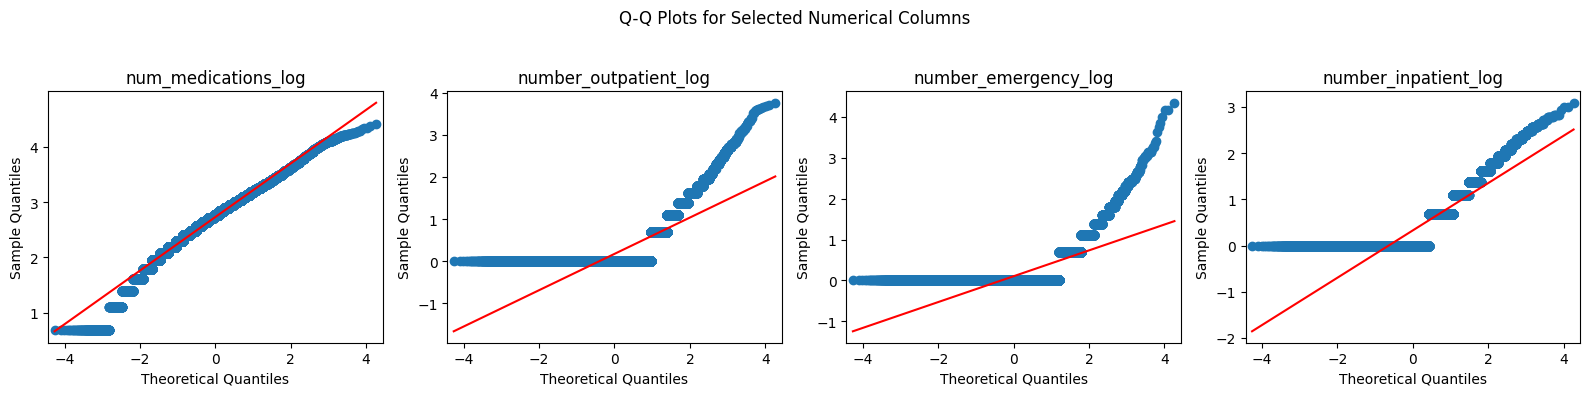

In [32]:
# Plotting Q-Q plot to understand the distributions better and evaluate if they're gaussian
import statsmodels.api as sm
import matplotlib.pyplot as plt

columns_to_plot = ['num_medications_log', 'number_outpatient_log', 'number_emergency_log', 'number_inpatient_log']

# Set up a single row of plots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(16, 4))
fig.suptitle("Q-Q Plots for Selected Numerical Columns")

# Plot individual Q-Q plots for each column
for i, col in enumerate(columns_to_plot):
    sm.qqplot(df_copy[col], line='s', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Applying log helped transform num_medications to gaussian. Though others are moving toward gaussian, they still deviate.

In [33]:
# Replacing the original columns with transformed column and dropping the transformed column
df_copy['num_medications'] = df_copy['num_medications_log']

# Drop columns we don't require
columns_to_drop = ['num_medications_log', 'number_outpatient_log', 'number_emergency_log', 'number_inpatient_log']
df_copy.drop(columns=columns_to_drop, inplace=True)

Applying cuberoot transformation for the other 3 columns

In [34]:
columns_to_transform = ['number_outpatient', 'number_emergency', 'number_inpatient']

for column in columns_to_transform:
    transformed_values = df_copy[column] ** (1/3)
    df_copy[column + '_cuberoot'] = transformed_values

# Displaying the transformed DataFrame
df_copy.head()

race  gender      age admission_type_id  \
1        Caucasian  Female  [10-20)                 1   
2  AfricanAmerican  Female  [20-30)                 1   
3        Caucasian    Male  [30-40)                 1   
4        Caucasian    Male  [40-50)                 1   
5        Caucasian    Male  [50-60)                 2   

  discharge_disposition_id admission_source_id  time_in_hospital  \
1                        1                   7                 3   
2                        1                   7                 2   
3                        1                   7                 2   
4                        1                   7                 1   
5                        1                   2                 3   

   num_lab_procedures  num_procedures  num_medications  number_outpatient  \
1                  59               0         2.944439                  0   
2                  11               5         2.639057                  2   
3                  44               1         2.833213                  0   
4                  51               0         2.197225                  0   
5                  31               6         2.833213                  0   

   number_emergency  number_inpatient diag_1  diag_2 diag_3  number_diagnoses  \
1                 0                 0    276  250.01    255                 9   
2                 0                 1    648     250    V27                 6   
3                 0                 0      8  250.43    403                 7   
4                 0                 0    197     157    250                 5   
5                 0                 0    414     411    250                 9   

  max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide  \
1          None      None        No          No          No             No   
2          None      None        No          No          No             No   
3          None      None        No          No          No             No   
4          None      None        No          No          No             No   
5          None      None        No          No          No             No   

  glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone  \
1          No            No        No        No          No           No   
2          No            No    Steady        No          No           No   
3          No            No        No        No          No           No   
4          No            No    Steady        No          No           No   
5          No            No        No        No          No           No   

  rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton  \
1            No       No       No           No         No      No          No   
2            No       No       No           No         No      No          No   
3            No       No       No           No         No      No          No   
4            No       No       No           No         No      No          No   
5            No       No       No           No         No      No          No   

  insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
1      Up                  No                  No                       No   
2      No                  No                  No                       No   
3      Up                  No                  No                       No   
4  Steady                  No                  No                       No   
5  Steady                  No                  No                       No   

  metformin-rosiglitazone metformin-pioglitazone change diabetesMed  \
1                      No                     No     Ch         Yes   
2                      No                     No     No         Yes   
3                      No                     No     Ch         Yes   
4                      No                     No     Ch         Yes   
5                      No                     No     No         Yes   

   

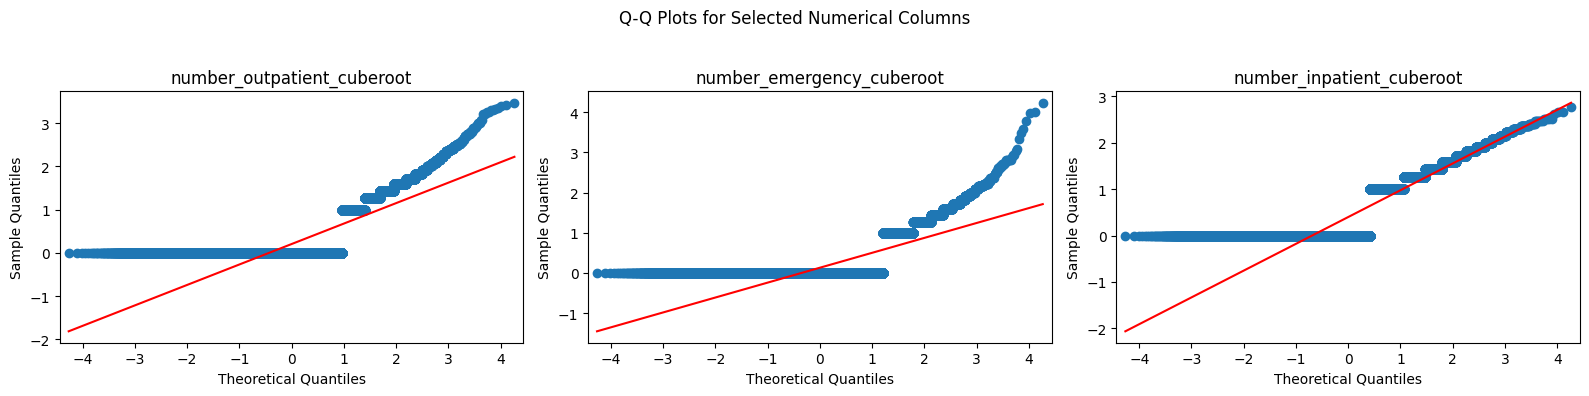

In [35]:
# Plotting Q-Q plot to understand the distributions better and evaluate if they're gaussian
import statsmodels.api as sm
import matplotlib.pyplot as plt

columns_to_plot = ['number_outpatient_cuberoot', 'number_emergency_cuberoot', 'number_inpatient_cuberoot']

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(16, 4))
fig.suptitle("Q-Q Plots for Selected Numerical Columns")

# Plot individual Q-Q plots for each column
for i, col in enumerate(columns_to_plot):
    sm.qqplot(df_copy[col], line='s', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Applying cuberoot worked on number_inpatient. Tried numerous transformation techniques but wasn't able to convert number outpatient and number_emergency to gaussian. Hence we can't use number_outpatient and number_emergency for gaussian NB algorithm. We can use it with Neural Networks as it has no assumptions and logistic regression (as it's important to check if they're linearly separable and the distribution doesn't have to be gaussian)



In [36]:
# Replacing the original columns with transformed column and dropping the transformed column
df_copy['number_inpatient'] = df_copy['number_inpatient_cuberoot']

# Drop columns we don't require
columns_to_drop = ['number_outpatient_cuberoot', 'number_emergency_cuberoot', 'number_inpatient_cuberoot']
df_copy.drop(columns=columns_to_drop, inplace=True)

In [37]:
numeric_columns = df_copy.select_dtypes(include=['int','float']).columns.tolist()
print(numeric_columns)

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']


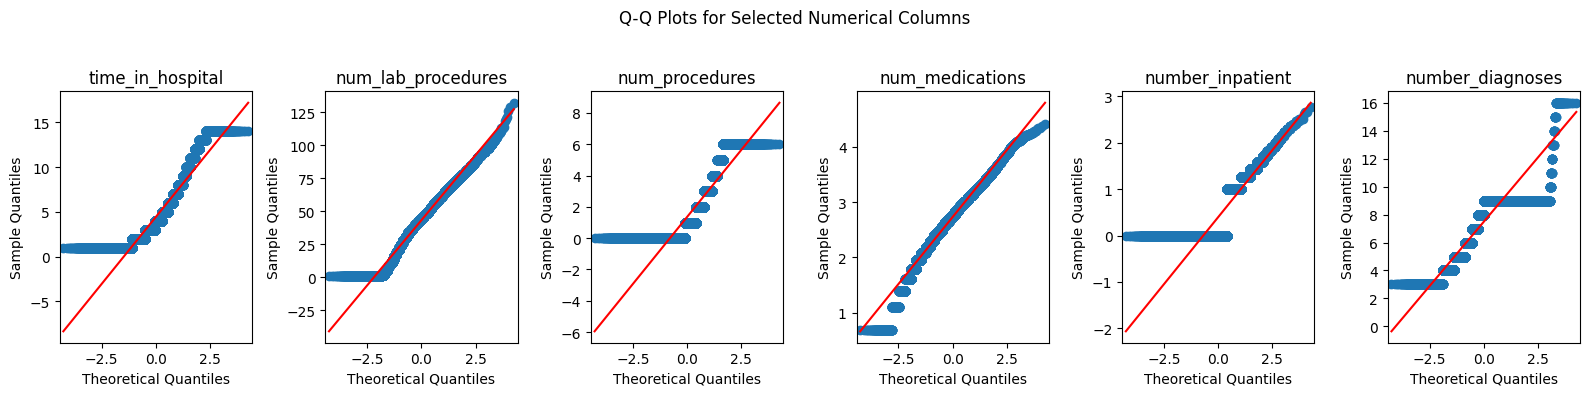

In [38]:
columns_to_plot = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses']

# Set up a single row of plots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(16, 4))
fig.suptitle("Q-Q Plots for Selected Numerical Columns")

# Plot individual Q-Q plots for each column
for i, col in enumerate(columns_to_plot):
    sm.qqplot(df_copy[col], line='s', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

We see that number_diagnoses isn't really gaussian as it has quite a few datapoints that deviate from the theoritical line in Q-Q plot.

**Checking for distributions by class below (For NB):**

For Class 1

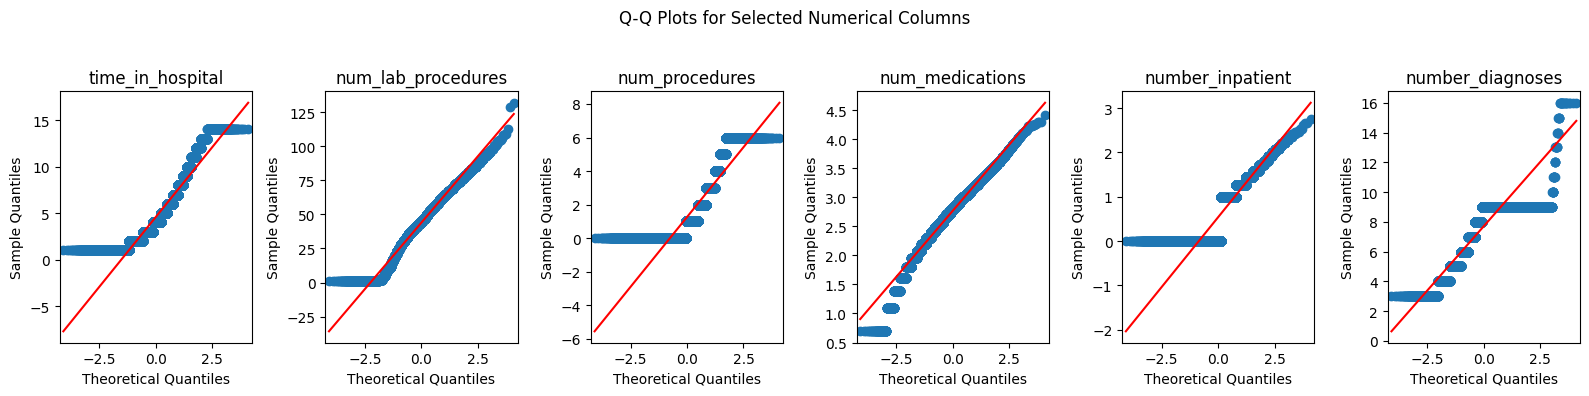

In [39]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

columns_to_plot = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses']

# Set up a single row of plots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(16, 4))
fig.suptitle("Q-Q Plots for Selected Numerical Columns")


# Filter for cases where readmitted equals 1
df_readmitted = df_copy[df_copy['readmitted'] == 1]

# Plot individual Q-Q plots for each column in the filtered DataFrame
for i, col in enumerate(columns_to_plot):
    sm.qqplot(df_readmitted[col], line='s', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

For Class 0

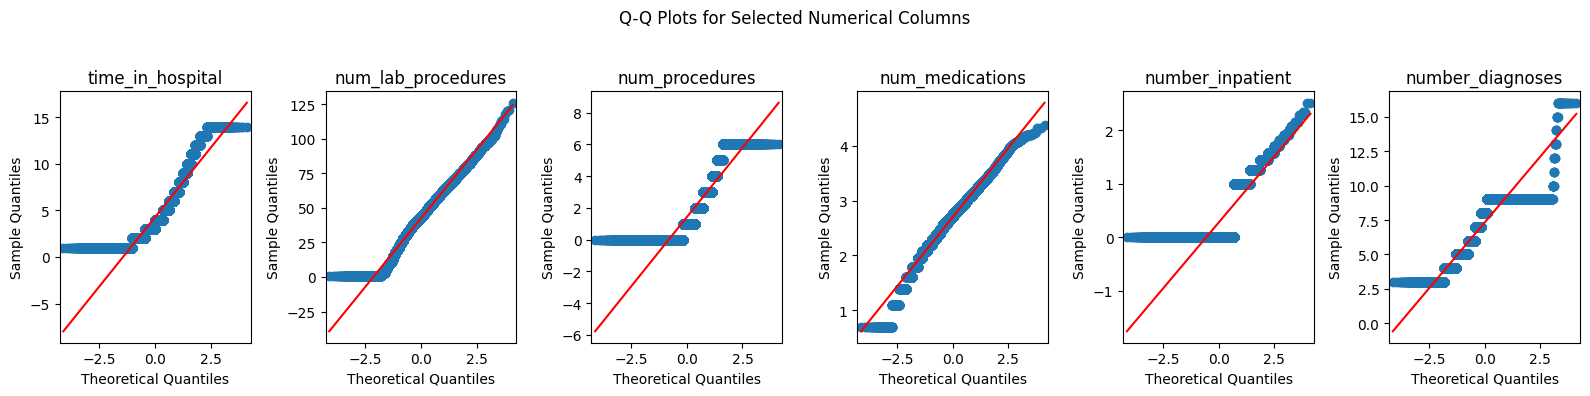

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

columns_to_plot = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses']

# Set up a single row of plots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(16, 4))
fig.suptitle("Q-Q Plots for Selected Numerical Columns")

# Filter for cases where readmitted equals 0
df_readmitted = df_copy[df_copy['readmitted'] == 0]

# Plot individual Q-Q plots for each column in the filtered DataFrame
for i, col in enumerate(columns_to_plot):
    sm.qqplot(df_readmitted[col], line='s', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

For the respective target classes, the numerical columns follow a gaussian distribution

For evaluating the relationship between numeric features and a binary target variable, we can use statistical tests such as the Student's t-test or the Mann-Whitney U test. These tests can be used to assess whether the means of the numeric variable are significantly different for the two levels of the binary target variable.

**Student's t-test:**
*   Assumes normality but is robust to deviations from normality, especially for larger sample sizes.
*   Tests whether the means of two groups are significantly different.

**Mann-Whitney U test:**
*   Non-parametric test that does not assume normality.
*   Tests whether the distributions of two groups are the same.

In [41]:
from scipy.stats import ttest_ind, mannwhitneyu

for column in numeric_columns:
    print(f"=== {column} ===")

    # Split data into two groups based on 'readmitted' values
    group_0 = df_copy[df_copy['readmitted'] == 0][column]
    group_1 = df_copy[df_copy['readmitted'] == 1][column]

    # Student's t-test
    t_stat, p_value_t = ttest_ind(group_0, group_1, equal_var=False)
    print(f"Student's t-test - p-value: {p_value_t:0.5e}")

    # Mann-Whitney U test
    stat, p_value_u = mannwhitneyu(group_0, group_1)
    print(f"Mann-Whitney U test - p-value: {p_value_u:0.5e}")

    # Interpretation
    alpha = 0.05
    print(f"\nNull Hypothesis (H0): There is no significant difference in {column} between the two groups.")
    print(f"Significance Level (alpha): {alpha}")
    print("\n---")

    if p_value_t < alpha:
        print("Conclusion (t-test): Reject H0. There is a significant difference.")
    else:
        print("Conclusion (t-test): Fail to reject H0. No significant difference.")

    if p_value_u < alpha:
        print("Conclusion (Mann-Whitney U): Reject H0. There is a significant difference.")
    else:
        print("Conclusion (Mann-Whitney U): Fail to reject H0. No significant difference.")

    print("\n=====================================\n")

=== time_in_hospital ===
Student's t-test - p-value: 3.51290e-54
Mann-Whitney U test - p-value: 1.97459e-76

Null Hypothesis (H0): There is no significant difference in time_in_hospital between the two groups.
Significance Level (alpha): 0.05

---
Conclusion (t-test): Reject H0. There is a significant difference.
Conclusion (Mann-Whitney U): Reject H0. There is a significant difference.


=== num_lab_procedures ===
Student's t-test - p-value: 4.10263e-33
Mann-Whitney U test - p-value: 9.37205e-36

Null Hypothesis (H0): There is no significant difference in num_lab_procedures between the two groups.
Significance Level (alpha): 0.05

---
Conclusion (t-test): Reject H0. There is a significant difference.
Conclusion (Mann-Whitney U): Reject H0. There is a significant difference.


=== num_procedures ===
Student's t-test - p-value: 3.54968e-50
Mann-Whitney U test - p-value: 1.08074e-52

Null Hypothesis (H0): There is no significant difference in num_procedures between the two groups.
Signif

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


We see that all numeric columns indicate that they're useful in predicting readmitted as the means are different for both values of readmitted.

## For categorical columns

## Preparing data for naive bayes

Checking for categorical variables and their relation readmitted statistically using chi-square test

In [42]:
import pandas as pd

# Assuming df_copy is your DataFrame
categorical_columns = df_copy.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)
print(len(categorical_columns))

Categorical Columns:
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
36


In [43]:
from scipy.stats import chi2_contingency

for column in categorical_columns:
    print(f"=== {column} ===")

    # Create a contingency table
    contingency_table = pd.crosstab(df_copy[column], df_copy['readmitted'])

    # Chi-squared test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared test - p-value: {p_value:.5e}")

    # Interpretation
    alpha = 0.05
    print(f"\nNull Hypothesis (H0): There is no significant association between {column} and readmitted.")
    print(f"Significance Level (alpha): {alpha}")
    print("\n---")

    if p_value < alpha:
        print("Conclusion: Reject H0. There is a significant association.")
    else:
        print("Conclusion: Fail to reject H0. No significant association.")

    print("\n=====================================\n")

=== race ===
Chi-squared test - p-value: 5.57937e-55

Null Hypothesis (H0): There is no significant association between race and readmitted.
Significance Level (alpha): 0.05

---
Conclusion: Reject H0. There is a significant association.


=== gender ===
Chi-squared test - p-value: 7.89715e-08

Null Hypothesis (H0): There is no significant association between gender and readmitted.
Significance Level (alpha): 0.05

---
Conclusion: Reject H0. There is a significant association.


=== age ===
Chi-squared test - p-value: 3.30680e-34

Null Hypothesis (H0): There is no significant association between age and readmitted.
Significance Level (alpha): 0.05

---
Conclusion: Reject H0. There is a significant association.


=== admission_type_id ===
Chi-squared test - p-value: 2.30224e-79

Null Hypothesis (H0): There is no significant association between admission_type_id and readmitted.
Significance Level (alpha): 0.05

---
Conclusion: Reject H0. There is a significant association.


=== discharg

The Cramér's V statistic is a measure of association between two categorical variables, and it is derived from the chi-square statistic. When dealing with large datasets, the chi-square test can become statistically significant even when the association between variables is weak due to the large sample size. In such cases, Cramér's V is often preferred as it provides a more standardized measure of association that takes into account the size of the contingency table.

Checking statistical significance between each pair of categorical variables given a class and picking columns that are independent (This is an assumption for NB)

In [44]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import networkx as nx
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Filter df_copy for readmitted=1
df_filtered_1 = df_copy[df_copy['readmitted'] == 1]

# Extract only the categorical columns
df_categorical = df_filtered_1[categorical_columns]

# Convert categorical columns to numerical labels
le = LabelEncoder()
df_encoded = df_categorical.apply(le.fit_transform)

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for all pairs of categorical variables
cramer_matrix = pd.DataFrame(index=df_encoded.columns, columns=df_encoded.columns, dtype=float)
for col1 in df_encoded.columns:
    for col2 in df_encoded.columns:
        if col1 != col2:  # Exclude checking the dependency of a column with itself
            cramer_value = cramers_v(df_encoded[col1], df_encoded[col2])
            cramer_matrix.loc[col1, col2] = cramer_value

# Set a threshold for Cramer's V to determine dependence
threshold = 0.1  # Anything below this indicates weak association

# Identify dependent columns based on Cramer's V
dependent_columns = set()
for col1 in df_encoded.columns:
    for col2 in df_encoded.columns:
        if col1 != col2 and abs(cramer_matrix.loc[col1, col2]) > threshold:
            pair = tuple(sorted([col1, col2]))
            dependent_columns.add(pair)

# Create a graph from the dependent columns
G = nx.Graph()
G.add_nodes_from(df_encoded.columns)
for pair in dependent_columns:
    G.add_edge(pair[0], pair[1])

# Find the maximum independent set of columns
independent_columns_1 = set(nx.maximal_independent_set(G))

# Print the list of independent columns
print("Independent Columns (for class 1):")
print(independent_columns_1)
print(len(independent_columns_1))

Independent Columns (for class 1):
{'glimepiride-pioglitazone', 'repaglinide', 'tolbutamide', 'pioglitazone', 'glimepiride', 'glipizide-metformin', 'troglitazone', 'chlorpropamide', 'nateglinide', 'glyburide-metformin', 'metformin', 'acetohexamide', 'rosiglitazone', 'metformin-rosiglitazone', 'tolazamide', 'gender', 'race', 'citoglipton', 'miglitol', 'acarbose', 'A1Cresult', 'insulin', 'metformin-pioglitazone', 'glyburide', 'admission_type_id', 'glipizide', 'examide'}
27


In [45]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import networkx as nx
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Filter df_copy for readmitted=1
df_filtered_0 = df_copy[df_copy['readmitted'] == 0]

# Extract only the categorical columns
df_categorical = df_filtered_0[categorical_columns]

# Convert categorical columns to numerical labels
le = LabelEncoder()
df_encoded = df_categorical.apply(le.fit_transform)

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for all pairs of categorical variables
cramer_matrix = pd.DataFrame(index=df_encoded.columns, columns=df_encoded.columns, dtype=float)
for col1 in df_encoded.columns:
    for col2 in df_encoded.columns:
        if col1 != col2:  # Exclude checking the dependency of a column with itself
            cramer_value = cramers_v(df_encoded[col1], df_encoded[col2])
            cramer_matrix.loc[col1, col2] = cramer_value

# Set a threshold for Cramer's V to determine dependence
threshold = 0.1  # Adjust this value based on your preference

# Identify dependent columns based on Cramer's V
dependent_columns = set()
for col1 in df_encoded.columns:
    for col2 in df_encoded.columns:
        if col1 != col2 and abs(cramer_matrix.loc[col1, col2]) > threshold:
            pair = tuple(sorted([col1, col2]))
            dependent_columns.add(pair)

# Create a graph from the dependent columns
G = nx.Graph()
G.add_nodes_from(df_encoded.columns)
for pair in dependent_columns:
    G.add_edge(pair[0], pair[1])

# Find the maximum independent set of columns
independent_columns_0 = set(nx.maximal_independent_set(G))

# Print the list of independent columns
print("Independent Columns (for class 0):")
print(independent_columns_0)
print(len(independent_columns_0))

Independent Columns (for class 0):
{'glimepiride-pioglitazone', 'repaglinide', 'tolbutamide', 'pioglitazone', 'glimepiride', 'glipizide-metformin', 'troglitazone', 'chlorpropamide', 'age', 'max_glu_serum', 'nateglinide', 'glyburide-metformin', 'examide', 'acetohexamide', 'rosiglitazone', 'metformin-rosiglitazone', 'tolazamide', 'gender', 'race', 'citoglipton', 'miglitol', 'A1Cresult', 'insulin', 'metformin-pioglitazone', 'glyburide', 'glipizide', 'acarbose'}
27


In [46]:
# Find common elements
independent_columns = independent_columns_1 & independent_columns_0

# Print the common elements
print("Common Independent Columns:")
print(independent_columns)
print(len(independent_columns))

Common Independent Columns:
{'glimepiride-pioglitazone', 'repaglinide', 'tolbutamide', 'pioglitazone', 'glimepiride', 'glipizide-metformin', 'troglitazone', 'chlorpropamide', 'nateglinide', 'glyburide-metformin', 'acetohexamide', 'rosiglitazone', 'metformin-rosiglitazone', 'tolazamide', 'gender', 'race', 'citoglipton', 'miglitol', 'acarbose', 'A1Cresult', 'insulin', 'metformin-pioglitazone', 'glyburide', 'glipizide', 'examide'}
25


In [47]:
# Keep numerical columns
numerical_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted'],
      dtype='object')


In [48]:
df_subset = df_copy[independent_columns.union(numerical_columns)]

# Display the modified DataFrame
print("Subset DataFrame with Independent Columns and Numerical Columns:")
df_subset.shape

Subset DataFrame with Independent Columns and Numerical Columns:


(100244, 34)

In [49]:
df_subset.head()
# All features are independent - Suitable for naive bayes

glimepiride-pioglitazone repaglinide tolazamide tolbutamide  gender  \
1                       No          No         No          No  Female   
2                       No          No         No          No  Female   
3                       No          No         No          No    Male   
4                       No          No         No          No    Male   
5                       No          No         No          No    Male   

              race citoglipton pioglitazone  num_lab_procedures glimepiride  \
1        Caucasian          No           No                  59          No   
2  AfricanAmerican          No           No                  11          No   
3        Caucasian          No           No                  44          No   
4        Caucasian          No           No                  51          No   
5        Caucasian          No           No                  31          No   

   number_outpatient glipizide-metformin miglitol  number_emergency  \
1                  0                  No       No                 0   
2                  2                  No       No                 0   
3                  0                  No       No                 0   
4                  0                  No       No                 0   
5                  0                  No       No                 0   

  troglitazone chlorpropamide  number_diagnoses A1Cresult  num_medications  \
1           No             No                 9      None         2.944439   
2           No             No                 6      None         2.639057   
3           No             No                 7      None         2.833213   
4           No             No                 5      None         2.197225   
5           No             No                 9      None         2.833213   

  insulin metformin-pioglitazone nateglinide glyburide glyburide-metformin  \
1      Up                     No          No        No                  No   
2      No                     No          No        No                  No   
3      Up                     No          No        No                  No   
4  Steady                     No          No        No                  No   
5  Steady                     No          No        No                  No   

  examide  readmitted glipizide  time_in_hospital acetohexamide rosiglitazone  \
1      No           1        No                 3            No            No   
2      No           0    Steady                 2            No            No   
3      No           0        No                 2            No            No   
4      No           0    Steady                 1            No            No   
5      No           1        No                 3            No            No   

  acarbose metformin-rosiglitazone  number_inpatient  num_procedures  
1       No                      No               0.0               0  
2       No                      No               1.0               5  
3       No                      No               0.0               1  
4       No                      No               0.0               0  
5       No                      No               0.0               6

In [50]:
# Getting list of categorical variables
object_columns = df_subset.select_dtypes(include='object').columns.tolist()
print(object_columns)

['glimepiride-pioglitazone', 'repaglinide', 'tolazamide', 'tolbutamide', 'gender', 'race', 'citoglipton', 'pioglitazone', 'glimepiride', 'glipizide-metformin', 'miglitol', 'troglitazone', 'chlorpropamide', 'A1Cresult', 'insulin', 'metformin-pioglitazone', 'nateglinide', 'glyburide', 'glyburide-metformin', 'examide', 'glipizide', 'acetohexamide', 'rosiglitazone', 'acarbose', 'metformin-rosiglitazone']


In [51]:
# List of categorical columns
categorical_columns = object_columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_subset, columns=categorical_columns, drop_first=True)

# Display the resulting DataFrame
df_encoded.head()

num_lab_procedures  number_outpatient  number_emergency  number_diagnoses  \
1                  59                  0                 0                 9   
2                  11                  2                 0                 6   
3                  44                  0                 0                 7   
4                  51                  0                 0                 5   
5                  31                  0                 0                 9   

   num_medications  readmitted  time_in_hospital  number_inpatient  \
1         2.944439           1                 3               0.0   
2         2.639057           0                 2               1.0   
3         2.833213           0                 2               0.0   
4         2.197225           0                 1               0.0   
5         2.833213           1                 3               0.0   

   num_procedures  glimepiride-pioglitazone_Steady  repaglinide_No  \
1               0                                0               1   
2               5                                0               1   
3               1                                0               1   
4               0                                0               1   
5               6                                0               1   

   repaglinide_Steady  repaglinide_Up  tolazamide_Steady  tolazamide_Up  \
1                   0               0                  0              0   
2                   0               0                  0              0   
3                   0               0                  0              0   
4                   0               0                  0              0   
5                   0               0                  0              0   

   tolbutamide_Steady  gender_Male  gender_Unknown/Invalid  race_Asian  \
1                   0            0                       0           0   
2                   0            0                       0           0   
3                   0            1                       0           0   
4                   0            1                       0           0   
5                   0            1                       0           0   

   race_Caucasian  race_Hispanic  race_Other  race_Unknown  pioglitazone_No  \
1               1              0           0             0                1   
2               0              0           0             0                1   
3               1              0           0             0                1   
4               1              0           0             0                1   
5               1              0           0             0                1   

   pioglitazone_Steady  pioglitazone_Up  glimepiride_No  glimepiride_Steady  \
1                    0                0               1                   0   
2                    0                0               1                   0   
3                    0                0               1                   0   
4                    0                0               1                   0   
5                    0                0               1                   0   

   glimepiride_Up  glipizide-metformin_Steady  miglitol_No  miglitol_Steady  \
1               0                           0            1                0   
2               0                           0            1                0   
3               0                           0            1                0   
4               0                           0            1                0   
5               0                           0            1                0   

   miglitol_Up  troglitazone_Steady  chlorpropamide_No  chlorpropamide_Steady  \
1            0                    0                  1                      0   
2            0                    0                  1                      0   
3            0                    0                  1                      0   
4            0                    0

In [52]:
df_encoded.shape
# We have 100.2k records and 64 columns (63 features and 1 target)

(100244, 64)

In [53]:
# Making readmitted as the last column
readmitted_column = df_encoded.pop('readmitted')
df_encoded['readmitted'] = readmitted_column
df_encoded.head()

num_lab_procedures  number_outpatient  number_emergency  number_diagnoses  \
1                  59                  0                 0                 9   
2                  11                  2                 0                 6   
3                  44                  0                 0                 7   
4                  51                  0                 0                 5   
5                  31                  0                 0                 9   

   num_medications  time_in_hospital  number_inpatient  num_procedures  \
1         2.944439                 3               0.0               0   
2         2.639057                 2               1.0               5   
3         2.833213                 2               0.0               1   
4         2.197225                 1               0.0               0   
5         2.833213                 3               0.0               6   

   glimepiride-pioglitazone_Steady  repaglinide_No  repaglinide_Steady  \
1                                0               1                   0   
2                                0               1                   0   
3                                0               1                   0   
4                                0               1                   0   
5                                0               1                   0   

   repaglinide_Up  tolazamide_Steady  tolazamide_Up  tolbutamide_Steady  \
1               0                  0              0                   0   
2               0                  0              0                   0   
3               0                  0              0                   0   
4               0                  0              0                   0   
5               0                  0              0                   0   

   gender_Male  gender_Unknown/Invalid  race_Asian  race_Caucasian  \
1            0                       0           0               1   
2            0                       0           0               0   
3            1                       0           0               1   
4            1                       0           0               1   
5            1                       0           0               1   

   race_Hispanic  race_Other  race_Unknown  pioglitazone_No  \
1              0           0             0                1   
2              0           0             0                1   
3              0           0             0                1   
4              0           0             0                1   
5              0           0             0                1   

   pioglitazone_Steady  pioglitazone_Up  glimepiride_No  glimepiride_Steady  \
1                    0                0               1                   0   
2                    0                0               1                   0   
3                    0                0               1                   0   
4                    0                0               1                   0   
5                    0                0               1                   0   

   glimepiride_Up  glipizide-metformin_Steady  miglitol_No  miglitol_Steady  \
1               0                           0            1                0   
2               0                           0            1                0   
3               0                           0            1                0   
4               0                           0            1                0   
5               0                           0            1                0   

   miglitol_Up  troglitazone_Steady  chlorpropamide_No  chlorpropamide_Steady  \
1            0                    0                  1                      0   
2            0                    0                  1                      0   
3            0                    0                  1                      0   
4            0                    0                  1                      0   
5            0            

In [54]:
# Dataset Naive Bayes
columns_to_exclude = ['number_outpatient', 'number_emergency', 'number_diagnoses'] # As they aren't gaussian
df_for_nb = df_encoded.drop(columns=columns_to_exclude)

In [55]:
df_for_nb.shape

(100244, 61)

In [56]:
df_copy.shape

(100244, 45)

## Preparing data for logistic and neural nets

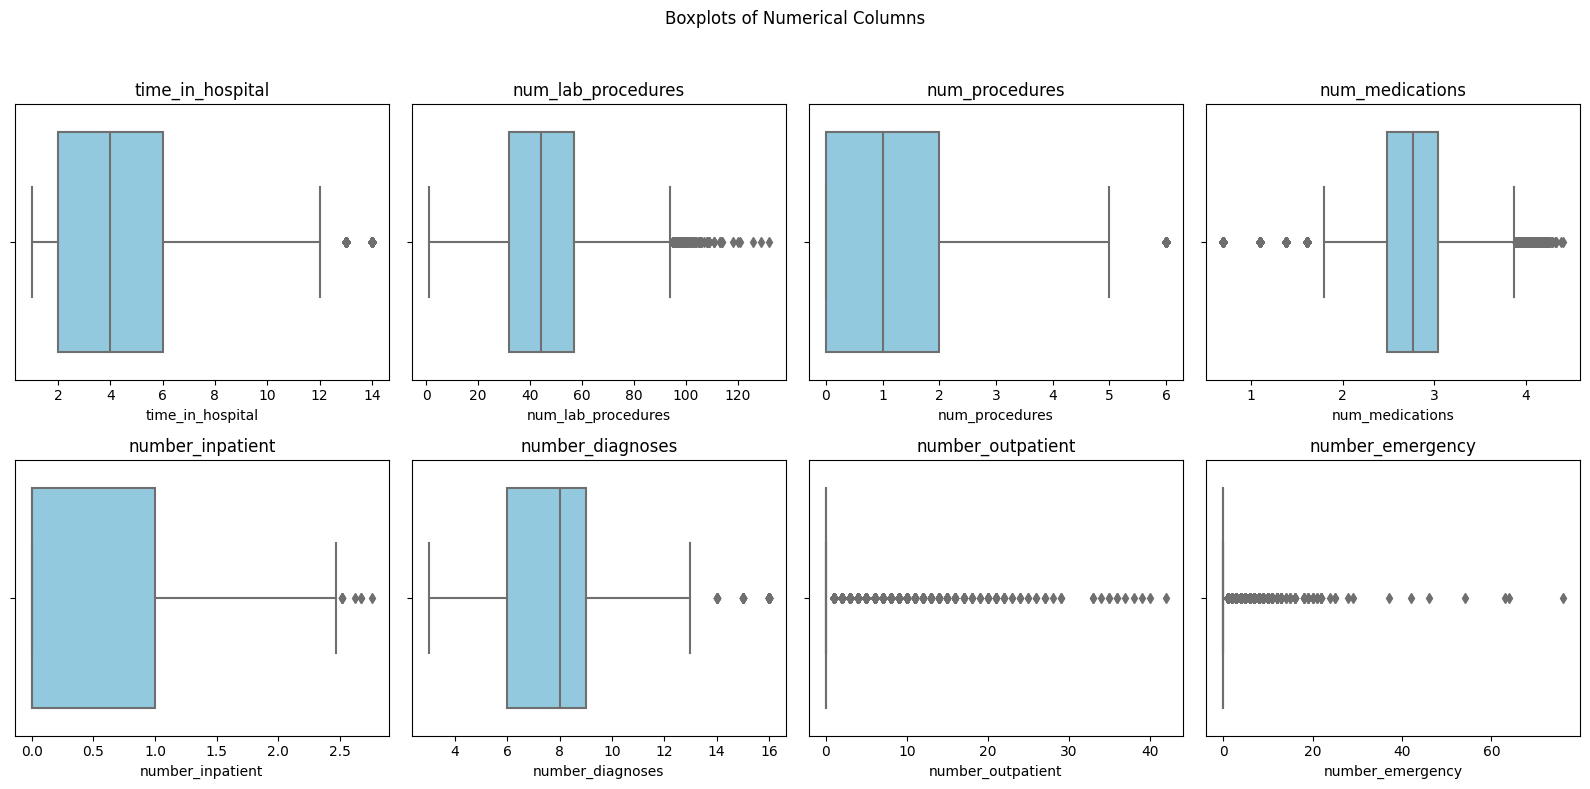

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'number_outpatient', 'number_emergency']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Boxplots of Numerical Columns")

# Plotting individual boxplots for each column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_copy[col], ax=axes.flatten()[i], color='skyblue')
    axes.flatten()[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

We see that number_outpatient and number_emergency have too many outliers. Logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable. Outliers can distort this relationship, leading to several potential issues

Trying transformation techniques to deal with outliers

In [76]:
import pandas as pd
import numpy as np

# Logarithmic transformation
df_copy['log_number_outpatient_log'] = np.log1p(df_copy['number_outpatient'])
df_copy['log_number_emergency_log'] = np.log1p(df_copy['number_emergency'])

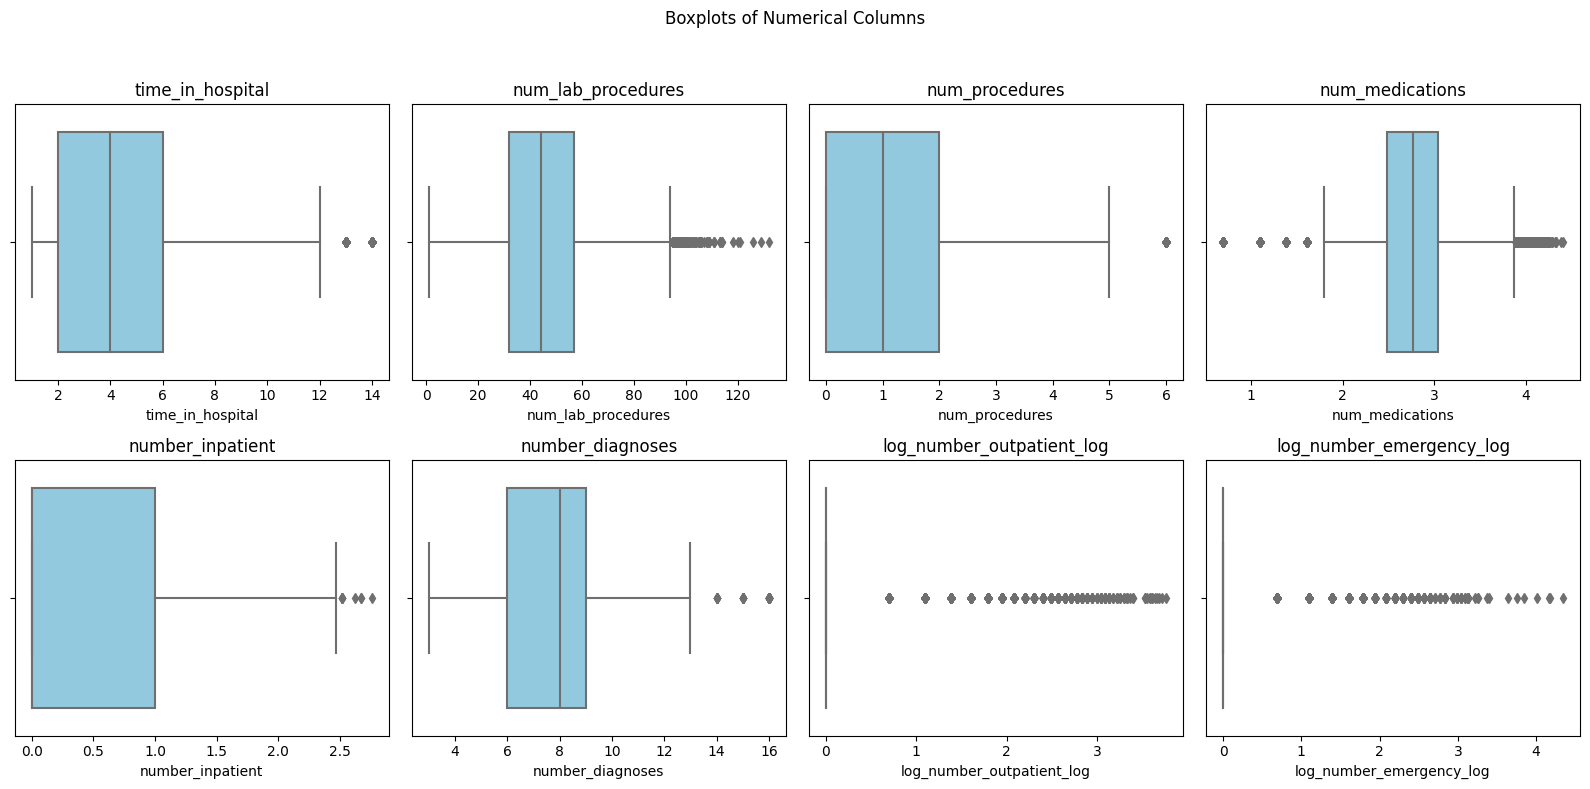

In [77]:
numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'log_number_outpatient_log', 'log_number_emergency_log']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Boxplots of Numerical Columns")

# Plotting individual boxplots for each column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_copy[col], ax=axes.flatten()[i], color='skyblue')
    axes.flatten()[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# This isn't helping so we won't be using these columns

It doesn't seem like transformation is helping

Checking if dependent and independent columns are linearly separable

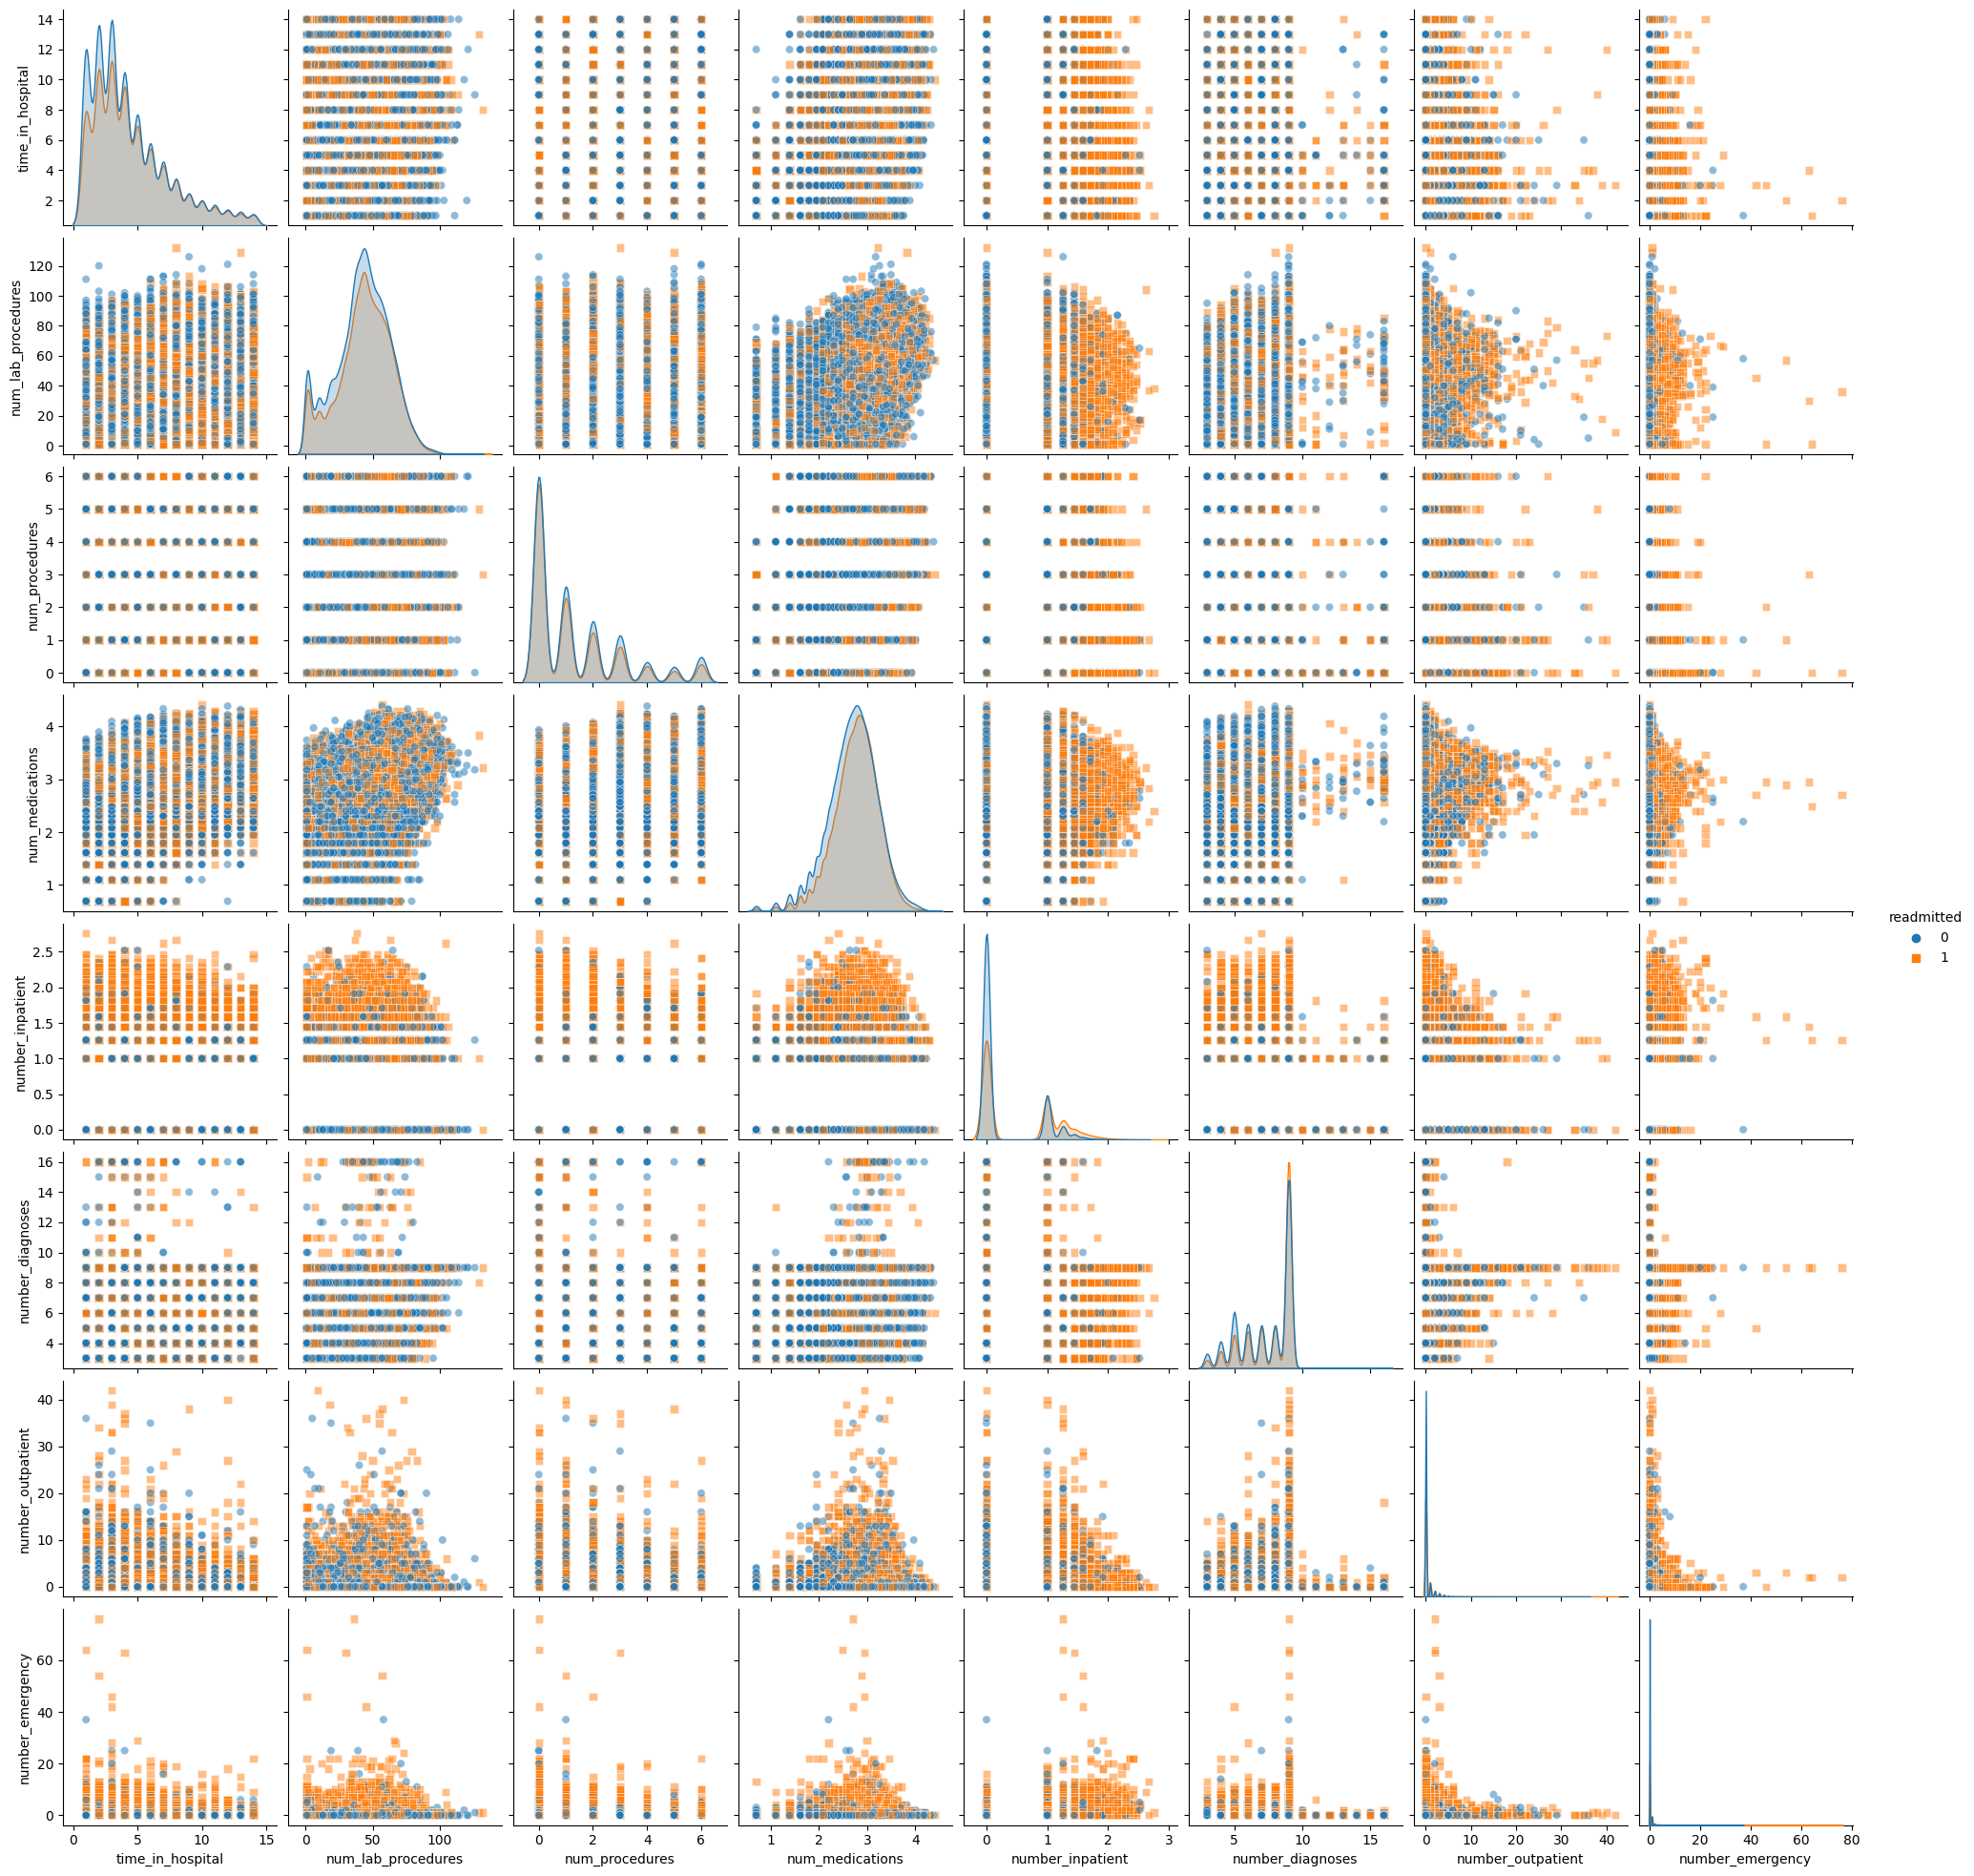

In [ ]:
# Checking if dependent and independent columns are linearly separable

import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'number_outpatient', 'number_emergency']
numerical_columns.append('readmitted')

# Select the relevant columns
df_numeric = df_copy[numerical_columns]

# Plot pairplots to visualize relationships
sns.pairplot(df_numeric, hue='readmitted', markers=['o', 's'], plot_kws={'alpha': 0.5})
plt.show()

We see that on plotting the pairplots, it's not really linearly separable wrt target variable. Except for number_inpatient & number emergency, where we see some amount of class separation. We can try checking linear separability by transforming variables in higher dimension.

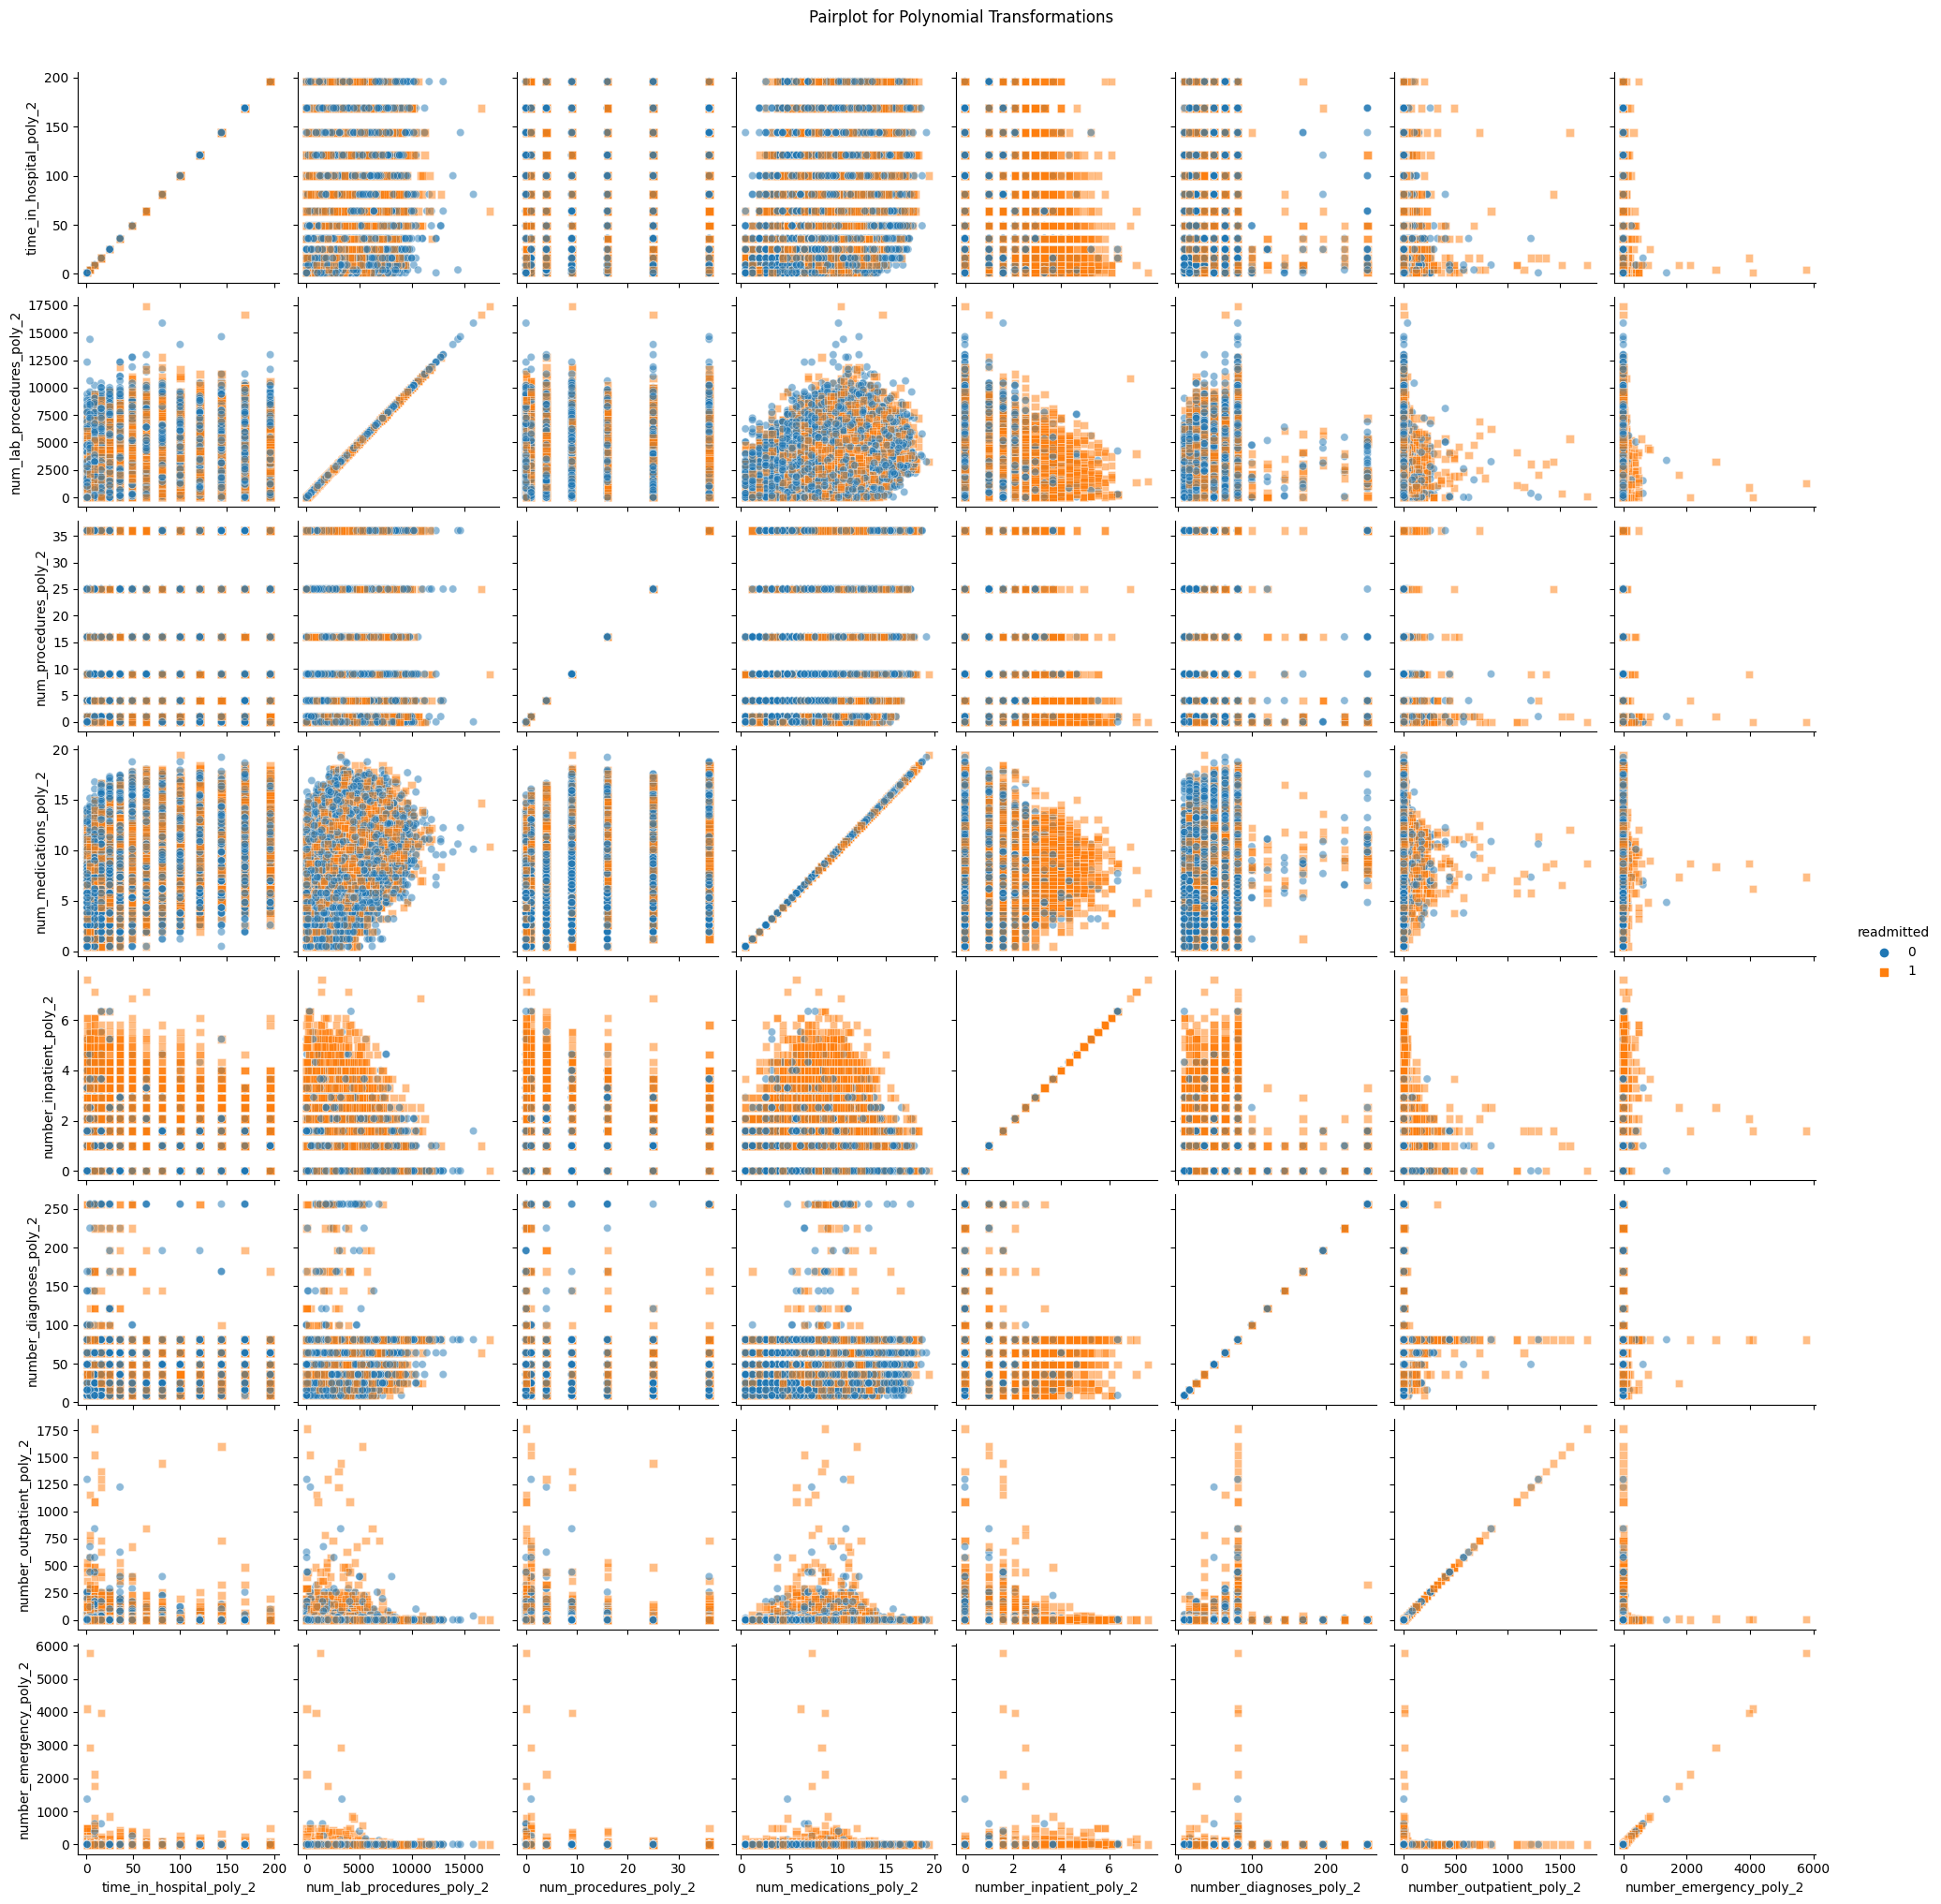

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_copy is your DataFrame
# Add the dependent variable 'readmitted' to the dataframe if it's not already present

# Select the relevant columns
numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'number_outpatient', 'number_emergency']

# Create a copy of the DataFrame to avoid modifying the original data
df_poly = df_copy.copy()

# Apply polynomial transformation to selected numerical columns
degree = 2  # You can adjust the degree of the polynomial
for col in numerical_columns:
    for d in range(2, degree + 1):
        df_poly[f"{col}_poly_{d}"] = df_poly[col] ** d

# Plot pairplots to visualize relationships after polynomial transformation
poly_columns = [f"{col}_poly_{d}" for col in numerical_columns for d in range(2, degree + 1)]
poly_columns += ['readmitted']  # Add the dependent variable for coloring

# Plot pairplot without including 'readmitted' in the axis labels
sns.pairplot(df_poly[poly_columns], hue='readmitted', markers=['o', 's'], plot_kws={'alpha': 0.5}, diag_kind=None)
plt.suptitle("Pairplot for Polynomial Transformations", y=1.02)
plt.show()

Even for higher degree polynomials, we only see class separation in number_inpatient. So we can use just this numerical column.

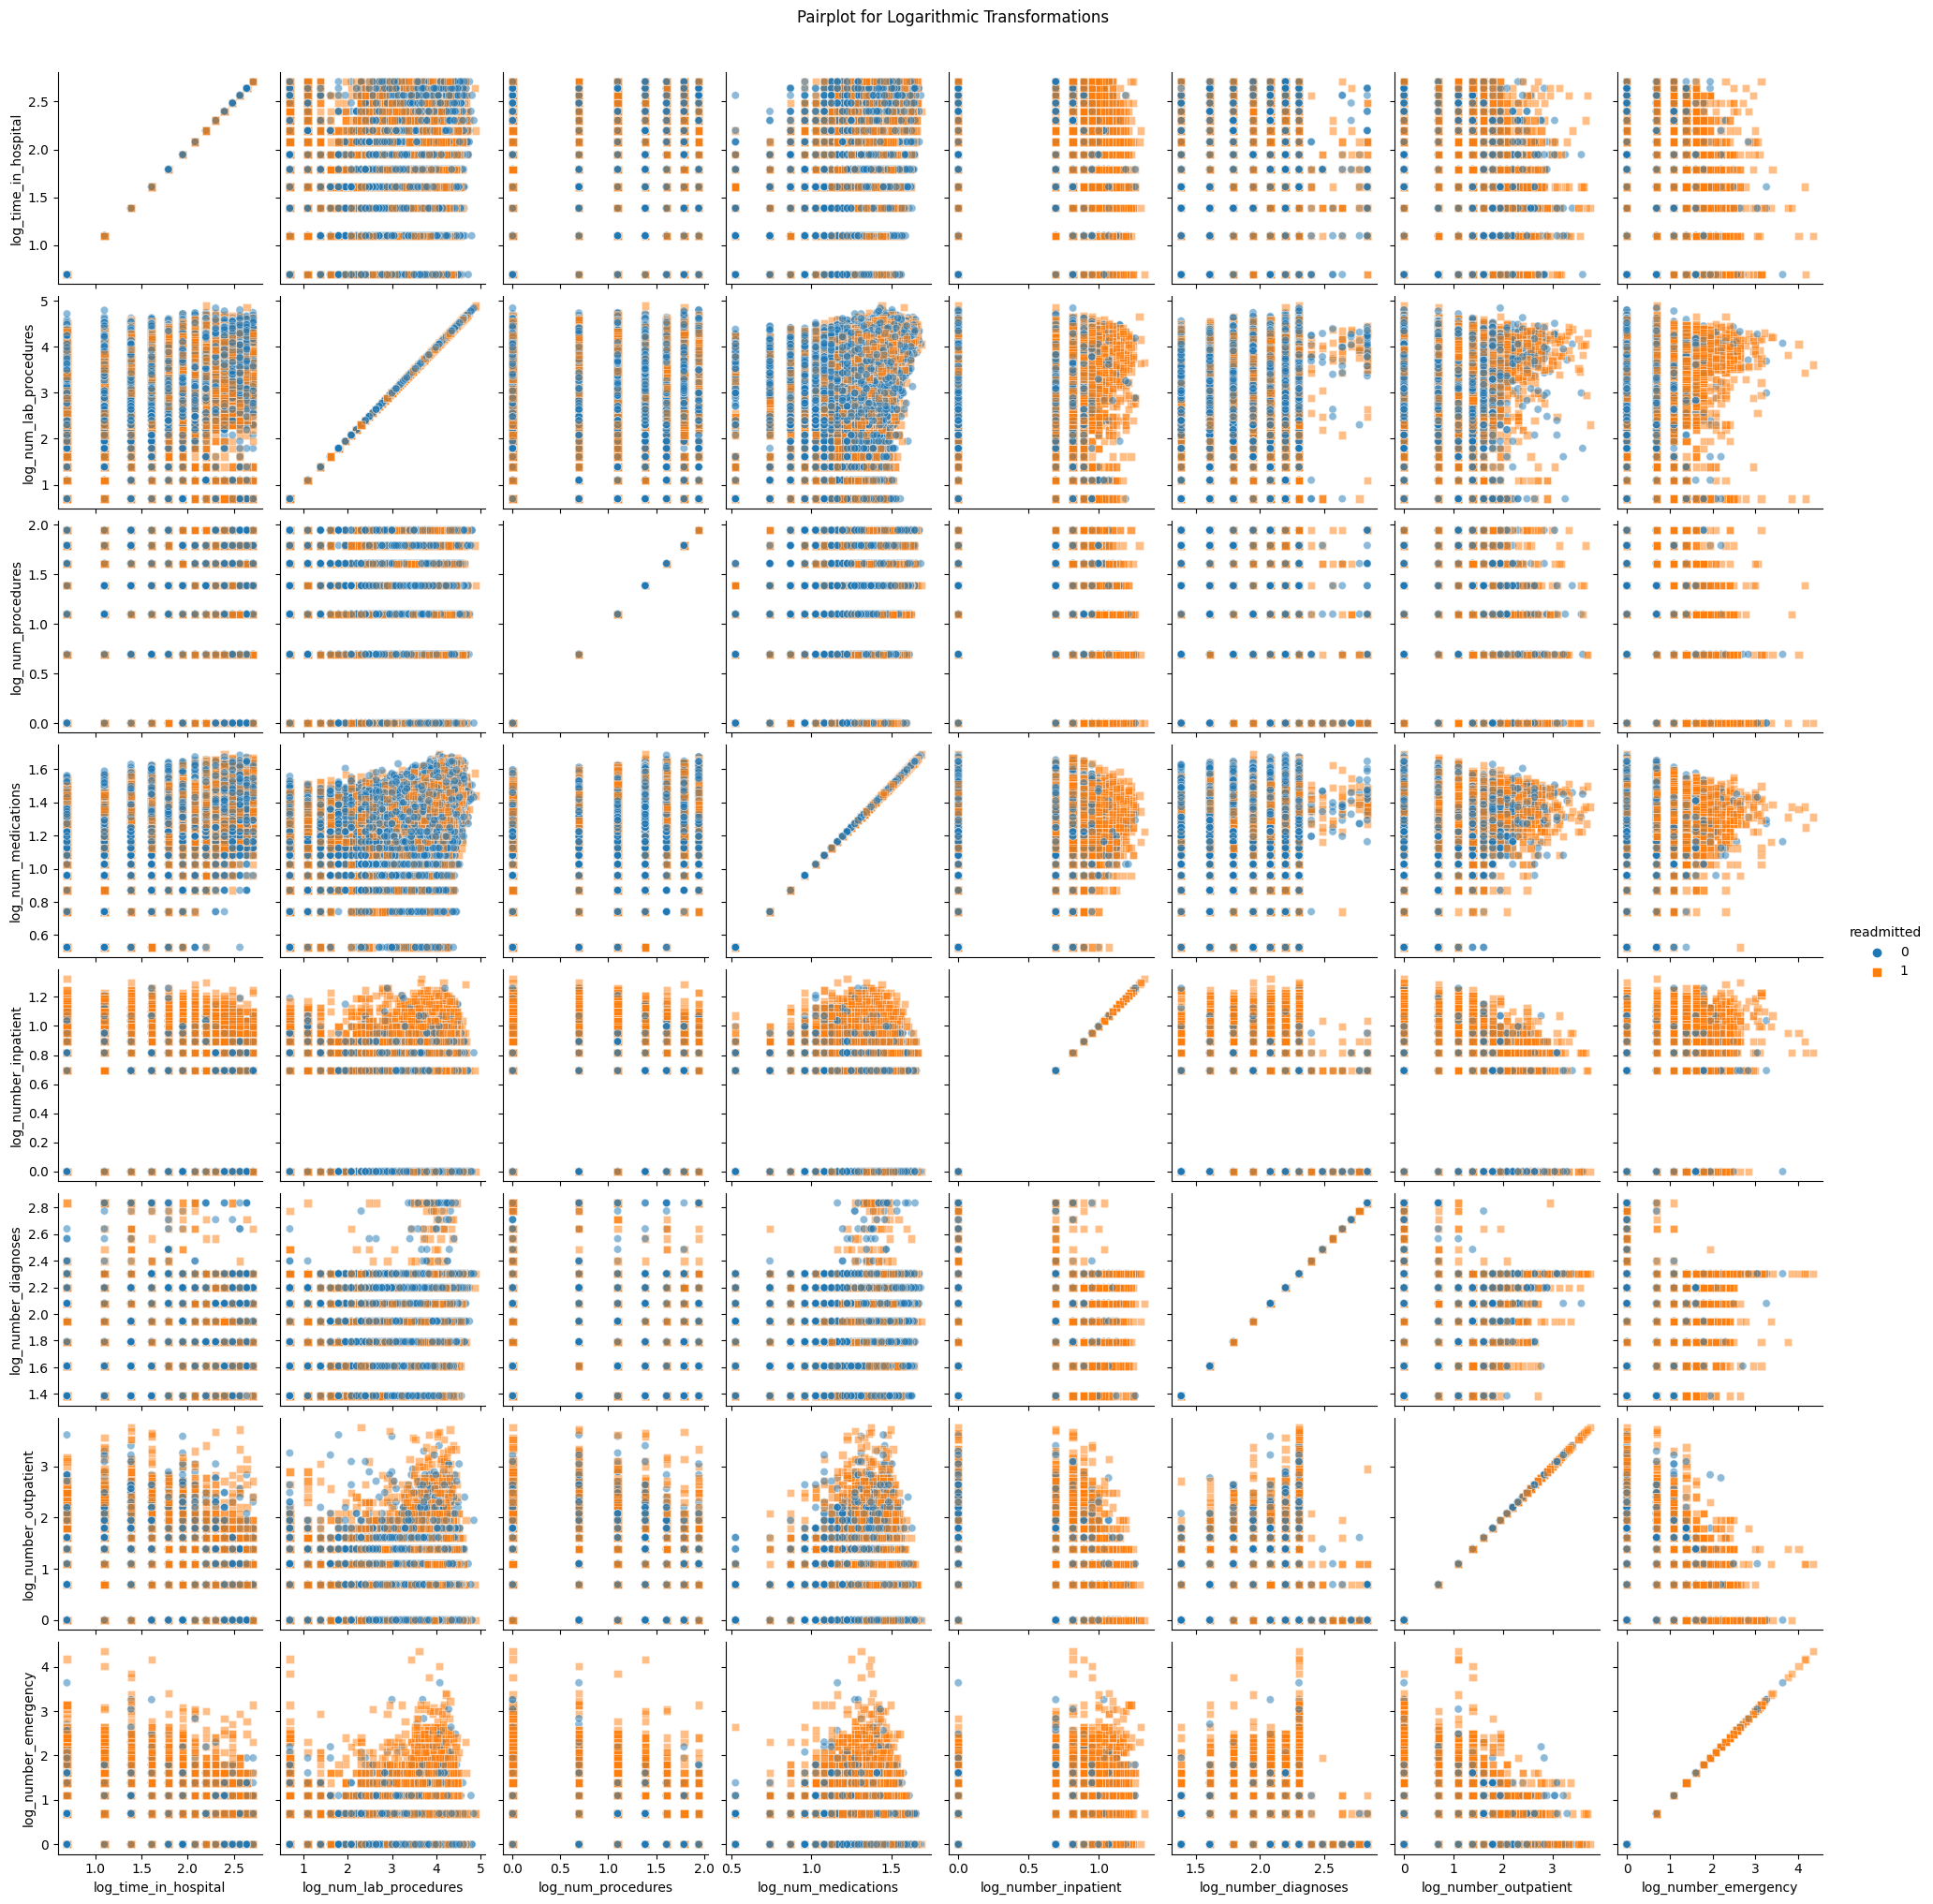

In [ ]:
# Trying log-transformation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'number_outpatient', 'number_emergency']

# Create a copy of the DataFrame to avoid modifying the original data
df_log = df_copy.copy()

# Apply logarithmic transformation to selected numerical columns
for col in numerical_columns:
    df_log[f"log_{col}"] = np.log1p(df_log[col])

# Plot pairplot to visualize relationships after logarithmic transformation
log_columns = [f"log_{col}" for col in numerical_columns]
log_columns += ['readmitted']  # Add the dependent variable for coloring

# Plot pairplot without including 'readmitted' in the axis labels
sns.pairplot(df_log[log_columns], hue='readmitted', markers=['o', 's'], plot_kws={'alpha': 0.5}, diag_kind=None)
plt.suptitle("Pairplot for Logarithmic Transformations", y=1.02)
plt.show()

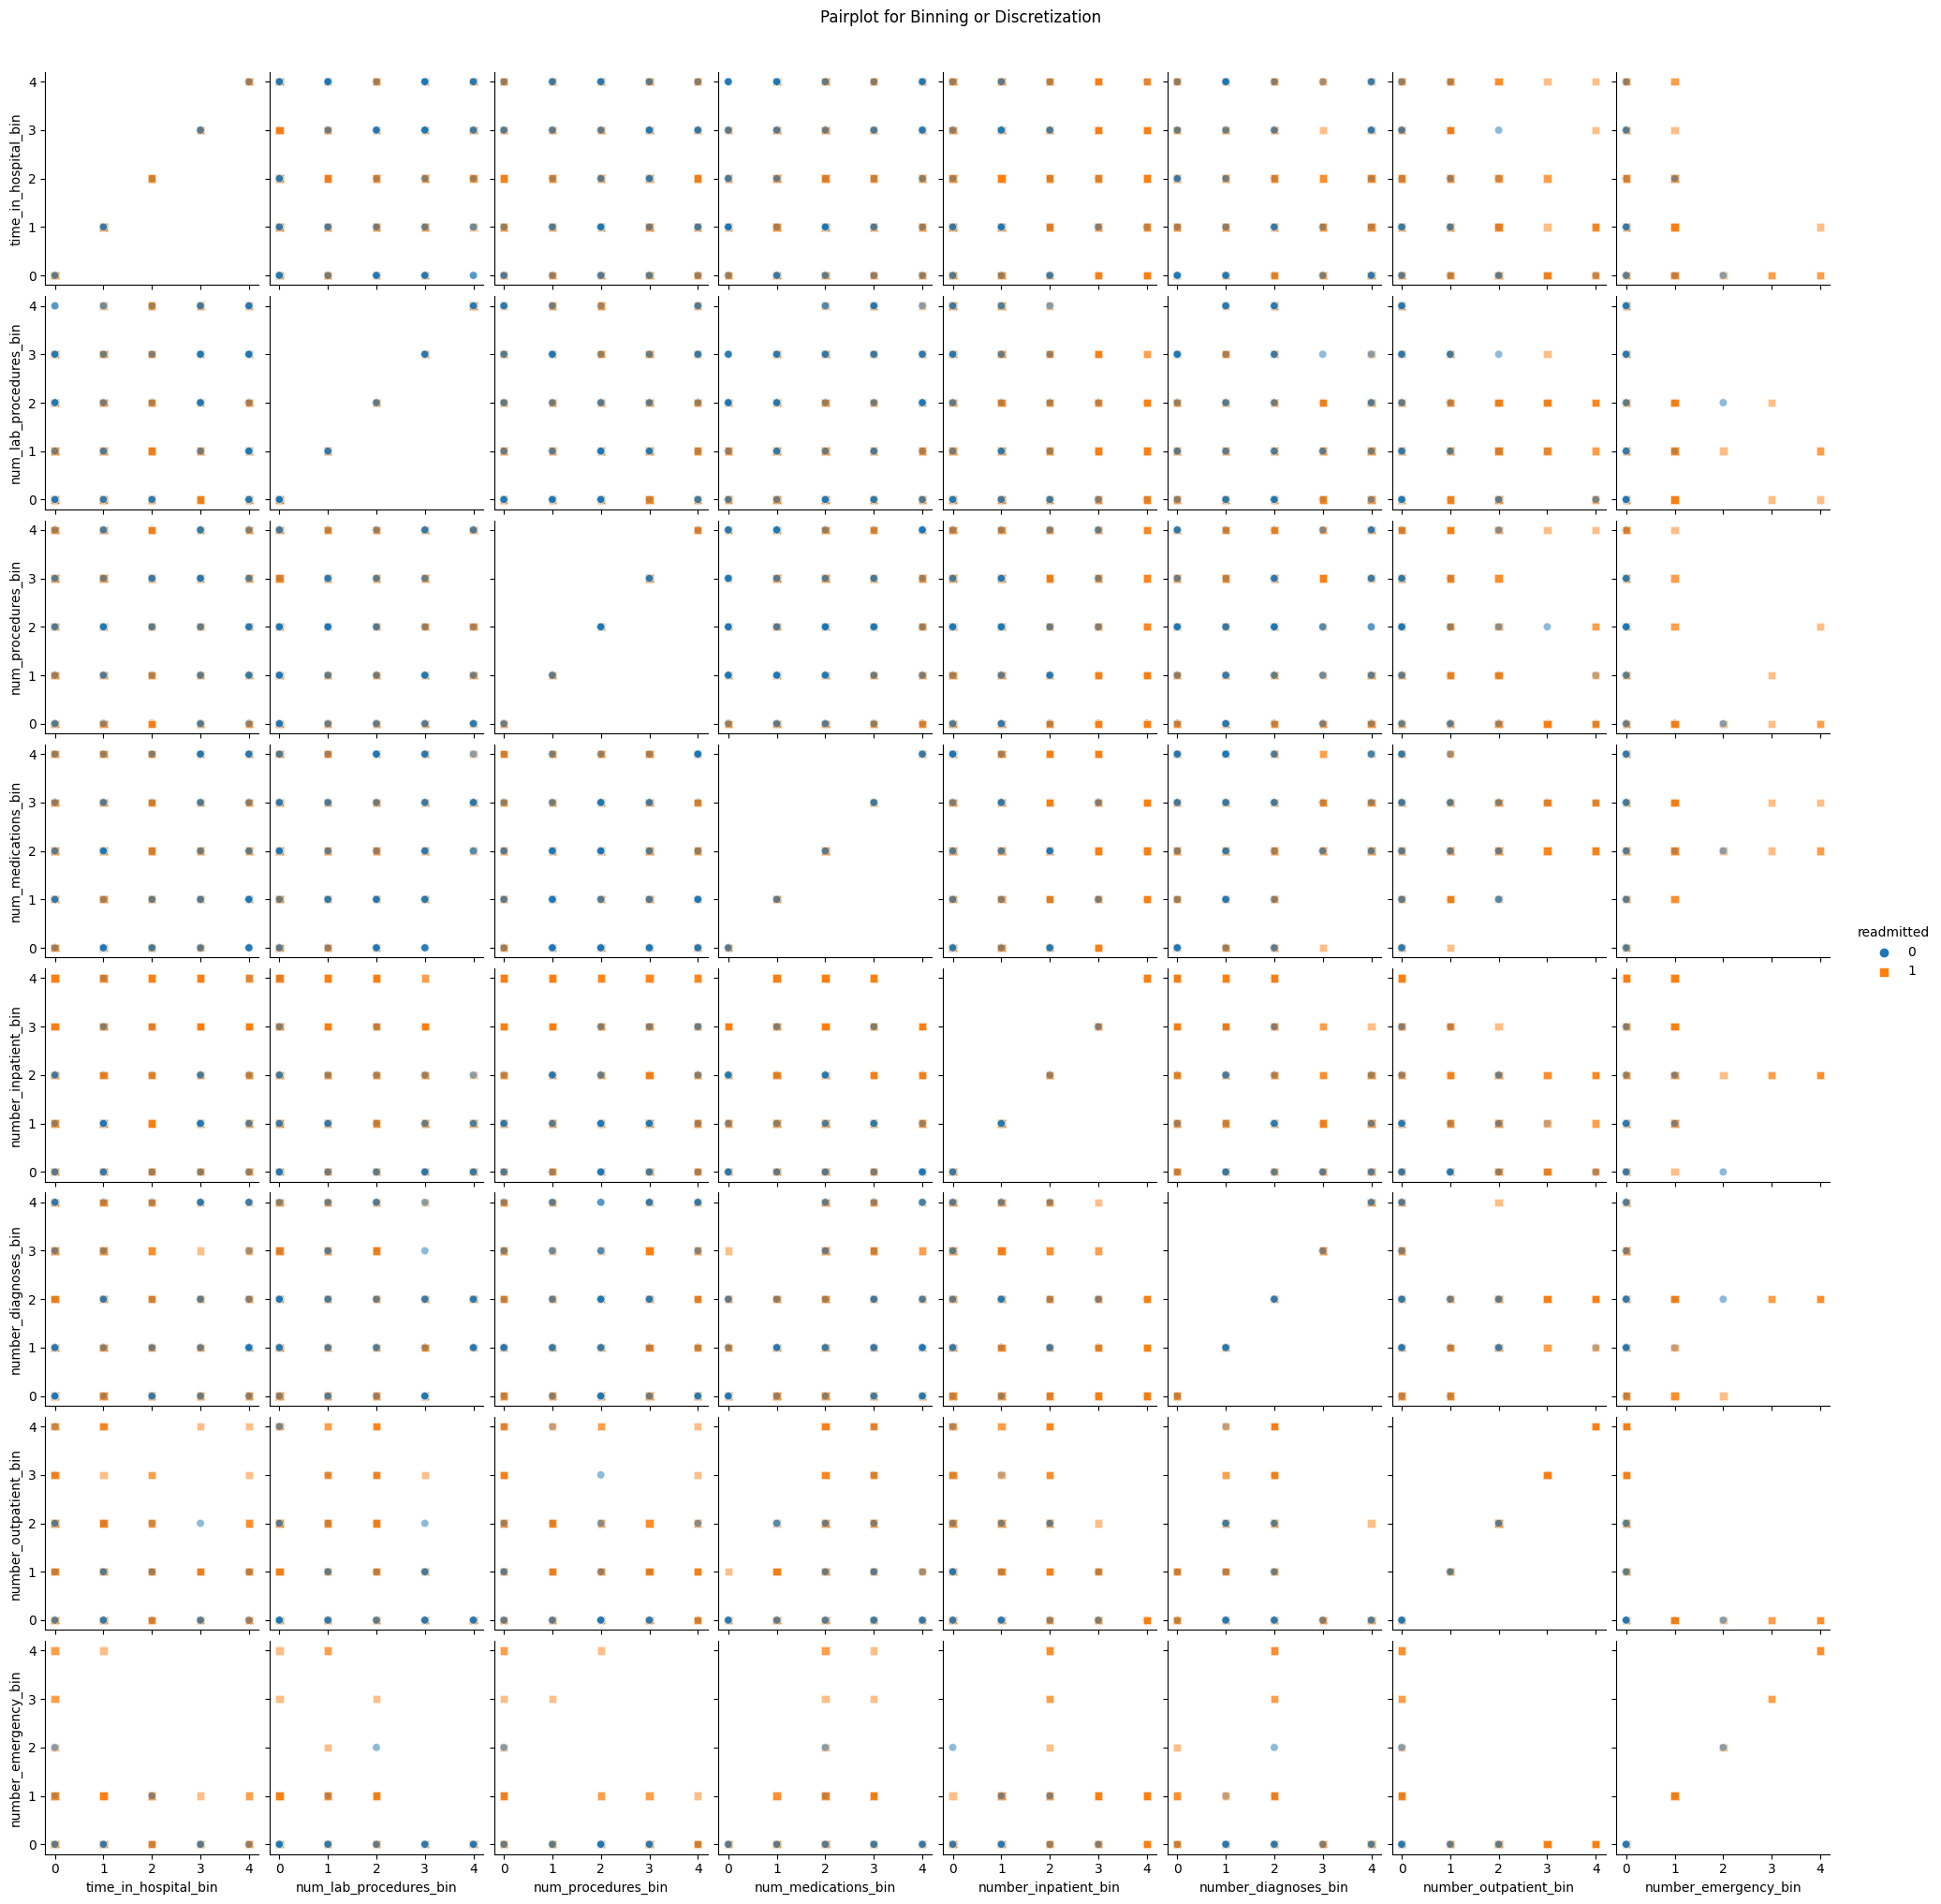

In [ ]:
# Trying binning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'number_outpatient', 'number_emergency']

# Create a copy of the DataFrame to avoid modifying the original data
df_bin = df_copy.copy()

# Apply binning or discretization to selected numerical columns
num_bins = 5  # You can adjust the number of bins
for col in numerical_columns:
    df_bin[f"{col}_bin"] = pd.cut(df_bin[col], bins=num_bins, labels=False)

# Plot pairplot to visualize relationships after binning
bin_columns = [f"{col}_bin" for col in numerical_columns]
bin_columns += ['readmitted']  # Add the dependent variable for coloring

# Plot pairplot without including 'readmitted' in the axis labels
sns.pairplot(df_bin[bin_columns], hue='readmitted', markers=['o', 's'], plot_kws={'alpha': 0.5}, diag_kind=None)
plt.suptitle("Pairplot for Binning or Discretization", y=1.02)
plt.show()

After trying different transformation techniques, we see that only number_inpatient is linearly related to readmitted. Though number_emergency shows some separation, it has many outliers. So we can keep number_inpatient and drop the rest.

In [78]:
# Assuming df_copy is your DataFrame
columns_to_drop = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'number_outpatient', 'number_emergency']

# Create a new DataFrame df_lr without the specified columns
df_lr = df_copy.drop(columns=columns_to_drop).copy()

In [79]:
df_lr.shape

(100244, 40)

In [80]:
df_lr.head()

race  gender      age admission_type_id  \
1        Caucasian  Female  [10-20)                 1   
2  AfricanAmerican  Female  [20-30)                 1   
3        Caucasian    Male  [30-40)                 1   
4        Caucasian    Male  [40-50)                 1   
5        Caucasian    Male  [50-60)                 2   

  discharge_disposition_id admission_source_id  number_inpatient diag_1  \
1                        1                   7               0.0    276   
2                        1                   7               1.0    648   
3                        1                   7               0.0      8   
4                        1                   7               0.0    197   
5                        1                   2               0.0    414   

   diag_2 diag_3 max_glu_serum A1Cresult metformin repaglinide nateglinide  \
1  250.01    255          None      None        No          No          No   
2     250    V27          None      None        No          No          No   
3  250.43    403          None      None        No          No          No   
4     157    250          None      None        No          No          No   
5     411    250          None      None        No          No          No   

  chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide  \
1             No          No            No        No        No          No   
2             No          No            No    Steady        No          No   
3             No          No            No        No        No          No   
4             No          No            No    Steady        No          No   
5             No          No            No        No        No          No   

  pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide  \
1           No            No       No       No           No         No   
2           No            No       No       No           No         No   
3           No            No       No       No           No         No   
4           No            No       No       No           No         No   
5           No            No       No       No           No         No   

  examide citoglipton insulin glyburide-metformin glipizide-metformin  \
1      No          No      Up                  No                  No   
2      No          No      No                  No                  No   
3      No          No      Up                  No                  No   
4      No          No  Steady                  No                  No   
5      No          No  Steady                  No                  No   

  glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone  \
1                       No                      No                     No   
2                       No                      No                     No   
3                       No                      No                     No   
4                       No                      No                     No   
5                       No                      No                     No   

  change diabetesMed  readmitted  log_number_outpatient_log  \
1     Ch         Yes           1                   0.000000   
2     No         Yes           0                   1.098612   
3     Ch         Yes           0                   0.000000   
4     Ch         Yes           0                   0.000000   
5     No         Yes           1                   0.000000   

   log_number_emergency_log  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
5                       0.0

In [81]:
cat_columns = df_lr.select_dtypes(include='object').columns.tolist()
print(cat_columns)

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


In [82]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Assuming df is your DataFrame and cat_columns is the list of categorical columns
# Replace df with your actual DataFrame and adjust column names as needed

# Select the relevant columns
columns_to_test = ['readmitted'] + cat_columns

# Create a DataFrame with the selected columns
df_selected = df[columns_to_test].copy()

# Create a list to store the columns with significant association
significant_columns = []

# Set a threshold for Cramér's V (adjust as needed)
v_threshold = 0.1

# Loop through each categorical column and perform chi-squared test
for column in cat_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df_selected[column], df_selected['readmitted'])

    # Perform chi-squared test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    # Calculate Cramér's V
    v_stat = np.sqrt(chi2_stat / len(df_selected))

    # Format p-value in scientific notation
    p_value_sci = "{:e}".format(p_value)

    # Print results
    print(f"Chi-squared test for {column}: p-value = {p_value_sci}, Cramér's V = {v_stat:.4f}")

    # Check significance based on Cramér's V
    if abs(v_stat) > v_threshold:
        significant_columns.append(column)

# Display the list of columns with significant association
print("Columns with significant association (based on Cramér's V):")
print(significant_columns)

Chi-squared test for race: p-value = 5.957899e-17, Cramér's V = 0.0305
Chi-squared test for gender: p-value = 1.447272e-07, Cramér's V = 0.0192
Chi-squared test for age: p-value = 9.348415e-56, Cramér's V = 0.0555
Chi-squared test for admission_type_id: p-value = 6.037493e-80, Cramér's V = 0.0639
Chi-squared test for discharge_disposition_id: p-value = 0.000000e+00, Cramér's V = 0.1878
Chi-squared test for admission_source_id: p-value = 2.317985e-221, Cramér's V = 0.1063
Chi-squared test for diag_1: p-value = 0.000000e+00, Cramér's V = 0.2209
Chi-squared test for diag_2: p-value = 2.970695e-223, Cramér's V = 0.1975
Chi-squared test for diag_3: p-value = 4.000059e-182, Cramér's V = 0.1928
Chi-squared test for max_glu_serum: p-value = 1.933304e-09, Cramér's V = 0.0226
Chi-squared test for A1Cresult: p-value = 3.855751e-13, Cramér's V = 0.0263
Chi-squared test for metformin: p-value = 2.445917e-20, Cramér's V = 0.0321
Chi-squared test for repaglinide: p-value = 7.302647e-11, Cramér's V = 

Since most columns have a weak association, let's just use these columns and drop the rest.

In [83]:
columns_to_keep = ['discharge_disposition_id', 'admission_source_id',
                   'diag_1', 'diag_2', 'diag_3',
                   'number_inpatient', 'number_emergency', 'readmitted']

# Create df_lr with only the specified columns
df_lr_associated = df_copy[columns_to_keep].copy()

# Display the resulting DataFrame
df_lr_associated.head()

discharge_disposition_id admission_source_id diag_1  diag_2 diag_3  \
1                        1                   7    276  250.01    255   
2                        1                   7    648     250    V27   
3                        1                   7      8  250.43    403   
4                        1                   7    197     157    250   
5                        1                   2    414     411    250   

   number_inpatient  number_emergency  readmitted  
1               0.0                 0           1  
2               1.0                 0           0  
3               0.0                 0           0  
4               0.0                 0           0  
5               0.0                 0           1

In [84]:
import pandas as pd

# Categorical columns for one-hot encoding
categorical_columns = ['discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']

# Perform one-hot encoding with drop_first=True
df_lr_encoded = pd.get_dummies(df_lr_associated, columns=categorical_columns, drop_first=True)

# Display the resulting DataFrame
df_lr_encoded.head()

number_inpatient  number_emergency  readmitted  \
1               0.0                 0           1   
2               1.0                 0           0   
3               0.0                 0           0   
4               0.0                 0           0   
5               0.0                 0           1   

   discharge_disposition_id_10  discharge_disposition_id_11  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_12  discharge_disposition_id_13  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_14  discharge_disposition_id_15  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_16  discharge_disposition_id_17  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_18  discharge_disposition_id_19  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_2  discharge_disposition_id_20  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   discharge_disposition_id_22  discharge_disposition_id_23  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_24  discharge_disposition_id_25  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_27  discharge_disposition_id_28  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_3  discharge_disposition_id_4  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0      

In [85]:
df_lr_encoded.shape

(100244, 2288)

We see that there are many columns, we need to reduce dimensions

Getting only top categories present in most of the records (99%) and marking others as 'Others'

In [86]:
import pandas as pd

# Categorical columns for analysis
categorical_columns = ['discharge_disposition_id', 'admission_source_id']

# Create a DataFrame to store cumulative percentage results
cumulative_percentage_records_by_value = pd.DataFrame(columns=['Readmitted', 'Column', 'Value', 'Cumulative Percentage'])

# List of unique values in the 'readmitted' column
readmitted_values = df_lr_associated['readmitted'].unique()

# Loop through each unique value in 'readmitted'
for readmitted_value in readmitted_values:
    # Subset the DataFrame for the current 'readmitted' value
    subset_df = df_lr_associated[df_lr_associated['readmitted'] == readmitted_value]

    # Loop through each categorical column
    for column in categorical_columns:
        # Calculate value counts for the current categorical column
        value_counts = subset_df[column].value_counts()

        # Calculate percentage of records for each value
        percentages = (value_counts / len(subset_df)) * 100

        # Sort values by descending percentage
        sorted_values = percentages.sort_values(ascending=False)

        # Calculate cumulative percentage
        cumulative_percentages = sorted_values.cumsum()

        # Create a DataFrame for the current categorical column and 'readmitted' value
        column_df = pd.DataFrame({
            'Readmitted': [readmitted_value] * len(sorted_values),
            'Column': [column] * len(sorted_values),
            'Value': sorted_values.index,
            'Cumulative Percentage': cumulative_percentages.values
        })

        # Append the results to the cumulative_percentage_records_by_value DataFrame
        cumulative_percentage_records_by_value = cumulative_percentage_records_by_value.append(column_df, ignore_index=True)

# Display the results
print(cumulative_percentage_records_by_value)

# discharge_disposition_id [1,3,6,18,11,2,22,5,25,4,13]
# admission_source_id [7, 1, 17, 4, 6, 2, 5]

   Readmitted                    Column Value  Cumulative Percentage
0           1  discharge_disposition_id     1              57.628762
1           1  discharge_disposition_id     6              72.645025
2           1  discharge_disposition_id     3              87.579433
3           1  discharge_disposition_id    18              90.758891
4           1  discharge_disposition_id    22              93.044396
5           1  discharge_disposition_id     2              95.211425
6           1  discharge_disposition_id     5              96.484501
7           1  discharge_disposition_id    25              97.468927
8           1  discharge_disposition_id     4              98.283179
9           1  discharge_disposition_id     7              98.938026
10          1  discharge_disposition_id    23              99.308532
11          1  discharge_disposition_id    28              99.491631
12          1  discharge_disposition_id    13              99.610107
13          1  discharge_dispositi

In [87]:
# Values to keep for discharge_disposition_id and admission_source_id
discharge_disposition_values = ['1', '3', '6', '18', '11', '2', '22', '5', '25', '4', '13'] # These are the values for 99% of records
admission_source_values = ['7', '1', '17', '4', '6', '2', '5']

# Replace values in discharge_disposition_id
df_lr_associated['discharge_disposition_id'] = df_lr_associated['discharge_disposition_id'].apply(
    lambda x: x if x in discharge_disposition_values else 'Others'
)

# Replace values in admission_source_id
df_lr_associated['admission_source_id'] = df_lr_associated['admission_source_id'].apply(
    lambda x: x if x in admission_source_values else 'Others'
)

# Display the updated DataFrame
df_lr_associated.head()

discharge_disposition_id admission_source_id diag_1  diag_2 diag_3  \
1                        1                   7    276  250.01    255   
2                        1                   7    648     250    V27   
3                        1                   7      8  250.43    403   
4                        1                   7    197     157    250   
5                        1                   2    414     411    250   

   number_inpatient  number_emergency  readmitted  
1               0.0                 0           1  
2               1.0                 0           0  
3               0.0                 0           0  
4               0.0                 0           0  
5               0.0                 0           1

Taking top 50 values by % records that captures 75% od data. Marking rest as 'Others'

In [88]:
import pandas as pd

# Columns to process
diag_columns = ['diag_1', 'diag_2', 'diag_3']

# Number of top values to keep
top_n = 50 # Captures 75% of the records

# Create a DataFrame to store the top values
top_values_df = pd.DataFrame()

# Loop through each diagnostic column
for diag_column in diag_columns:
    # Calculate value counts for the current diagnostic column
    value_counts = df_lr_associated[diag_column].value_counts()

    # Calculate percentage of records for each value
    percentages = (value_counts / len(df_lr_associated)) * 100

    # Sort values by descending percentage
    sorted_values = percentages.sort_values(ascending=False)

    # Take the top N values
    top_values = sorted_values.head(top_n).index

    # Replace other values with 'Others'
    df_lr_associated[diag_column] = df_lr_associated[diag_column].apply(
        lambda x: x if x in top_values else 'Others'
    )

    # Store the top values in the DataFrame
    top_values_df[diag_column] = top_values

# Display the resulting DataFrame with modified diagnostic columns
df_lr_associated[diag_columns].head()

diag_1  diag_2  diag_3
1     276  250.01  Others
2  Others     250  Others
3       8  Others     403
4  Others  Others     250
5     414     411     250

In [89]:
df_lr_associated.head()

discharge_disposition_id admission_source_id  diag_1  diag_2  diag_3  \
1                        1                   7     276  250.01  Others   
2                        1                   7  Others     250  Others   
3                        1                   7       8  Others     403   
4                        1                   7  Others  Others     250   
5                        1                   2     414     411     250   

   number_inpatient  number_emergency  readmitted  
1               0.0                 0           1  
2               1.0                 0           0  
3               0.0                 0           0  
4               0.0                 0           0  
5               0.0                 0           1

In [90]:
import pandas as pd

# Assuming df_lr_associated is your DataFrame
# Replace df_lr_associated with your actual DataFrame

# Columns to one-hot encode
columns_to_encode = ['discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']

# Perform one-hot encoding
df_lr_encoded = pd.get_dummies(df_lr_associated, columns=columns_to_encode, drop_first=False)

# Display the resulting DataFrame with one-hot encoded columns
df_lr_encoded.head()

number_inpatient  number_emergency  readmitted  discharge_disposition_id_1  \
1               0.0                 0           1                           1   
2               1.0                 0           0                           1   
3               0.0                 0           0                           1   
4               0.0                 0           0                           1   
5               0.0                 0           1                           1   

   discharge_disposition_id_11  discharge_disposition_id_13  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_18  discharge_disposition_id_2  \
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
5                            0                           0   

   discharge_disposition_id_22  discharge_disposition_id_25  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_3  discharge_disposition_id_4  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   discharge_disposition_id_5  discharge_disposition_id_6  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   discharge_disposition_id_Others  admission_source_id_1  \
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   
5                                0                      0   

   admission_source_id_17  admission_source_id_2  admission_source_id_4  \
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   
5                       0                      1                      0   

   admission_source_id_5  admission_source_id_6  admission_source_id_7  \
1                      0                      0                      1   
2                      0                      0                      1   
3                      0                      0                      1   
4                      0                      0                      1   
5                      0                      0                      0   

   admission_source_id_Others  diag_1_162  diag_1_250.02  diag_1_250.11  \
1                           0           0              0              0   
2                           0           0              0              0   
3                           0           0              0              0   
4                           0           0              0              0   
5            

In [91]:
# Columns to drop
columns_to_drop = ['discharge_disposition_id_Others', 'admission_source_id_Others']

# Drop the specified columns
df_lr_encoded = df_lr_encoded.drop(columns=columns_to_drop)
df_lr_encoded.shape

(100244, 174)

In [92]:
# Making readmitted the last column
readmitted_column = df_lr_encoded.pop('readmitted')
df_lr_encoded['readmitted'] = readmitted_column
df_lr_encoded.head()

number_inpatient  number_emergency  discharge_disposition_id_1  \
1               0.0                 0                           1   
2               1.0                 0                           1   
3               0.0                 0                           1   
4               0.0                 0                           1   
5               0.0                 0                           1   

   discharge_disposition_id_11  discharge_disposition_id_13  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_18  discharge_disposition_id_2  \
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
5                            0                           0   

   discharge_disposition_id_22  discharge_disposition_id_25  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_3  discharge_disposition_id_4  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   discharge_disposition_id_5  discharge_disposition_id_6  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   admission_source_id_1  admission_source_id_17  admission_source_id_2  \
1                      0                       0                      0   
2                      0                       0                      0   
3                      0                       0                      0   
4                      0                       0                      0   
5                      0                       0                      1   

   admission_source_id_4  admission_source_id_5  admission_source_id_6  \
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   
5                      0                      0                      0   

   admission_source_id_7  diag_1_162  diag_1_250.02  diag_1_250.11  \
1                      1           0              0              0   
2                      1           0              0              0   
3                      1           0              0              0   
4                      1           0              0              0   
5                      0           0              0              0   

   diag_1_250.13  diag_1_250.6  diag_1_250.7  diag_1_250.8  diag_1_276  \
1              0             0             0             0           1   
2              0             0             0             0           0   
3              0             0             0             0           0   
4              0             0             0             0           0   
5              0             0      

# Running Models on the datasets created

## Naive Bayes

In [57]:
df_for_nb.describe()

num_lab_procedures  num_medications  time_in_hospital  \
count       100244.000000    100244.000000     100244.000000   
mean            43.173716         2.730123          4.420275   
std             19.691484         0.483760          2.991273   
min              1.000000         0.693147          1.000000   
25%             32.000000         2.484907          2.000000   
50%             44.000000         2.772589          4.000000   
75%             57.000000         3.044522          6.000000   
max            132.000000         4.406719         14.000000   

       number_inpatient  num_procedures  glimepiride-pioglitazone_Steady  \
count     100244.000000   100244.000000                    100244.000000   
mean           0.398673        1.350275                         0.000010   
std            0.577106        1.710913                         0.003158   
min            0.000000        0.000000                         0.000000   
25%            0.000000        0.000000                         0.000000   
50%            0.000000        1.000000                         0.000000   
75%            1.000000        2.000000                         0.000000   
max            2.758924        6.000000                         1.000000   

       repaglinide_No  repaglinide_Steady  repaglinide_Up  tolazamide_Steady  \
count   100244.000000       100244.000000   100244.000000      100244.000000   
mean         0.984707            0.013766        0.001077           0.000359   
std          0.122715            0.116521        0.032806           0.018947   
min          0.000000            0.000000        0.000000           0.000000   
25%          1.000000            0.000000        0.000000           0.000000   
50%          1.000000            0.000000        0.000000           0.000000   
75%          1.000000            0.000000        0.000000           0.000000   
max          1.000000            1.000000        1.000000           1.000000   

       tolazamide_Up  tolbutamide_Steady    gender_Male  \
count  100244.000000       100244.000000  100244.000000   
mean        0.000010            0.000229       0.462063   
std         0.003158            0.015146       0.498561   
min         0.000000            0.000000       0.000000   
25%         0.000000            0.000000       0.000000   
50%         0.000000            0.000000       0.000000   
75%         0.000000            0.000000       1.000000   
max         1.000000            1.000000       1.000000   

       gender_Unknown/Invalid     race_Asian  race_Caucasian  race_Hispanic  \
count           100244.000000  100244.000000   100244.000000  100244.000000   
mean                 0.000030       0.006235        0.748963       0.019792   
std                  0.005471       0.078715        0.433612       0.139285   
min                  0.000000       0.000000        0.000000       0.000000   
25%                  0.000000       0.000000        0.000000       0.000000   
50%                  0.000000       0.000000        1.000000       0.000000   
75%                  0.000000       0.000000        1.000000       0.000000   
max                  1.000000       1.000000        1.000000       1.000000   

          race_Other   race_Unknown  pioglitazone_No  pioglitazone_Steady  \
count  100244.000000  100244.000000    100244.000000        100244.000000   
mean        0.014804       0.021857         0.927726             0.068812   
std         0.120768       0.146216         0.258942             0.253136   
min         0.000000       0.000000         0.000000             0.000000   
25%         0.000000       0.000000         1.000000             0.000000   
50%         0.000000       0.000000         1.000000             0.000000   
75%         0.000000       0.000000         1.000000             0.000000   
max         1.000000       1.000000         1.000000             1.000000   

       pioglitazone_Up  glimepiride_No  glimepiride_Steady  glimepiride_Up  \
count   

In [58]:
X = df_for_nb.drop('readmitted', axis=1)
X = X.values
X

array([[59.        ,  2.94443898,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [11.        ,  2.63905733,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [44.        ,  2.83321334,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [53.        ,  2.30258509,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [45.        ,  3.09104245, 10.        , ...,  0.        ,
         0.        ,  0.        ],
       [13.        ,  1.38629436,  6.        , ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
y=df_for_nb['readmitted'].values
y

array([1, 0, 0, ..., 0, 0, 0])

In [60]:
# For tracking memory
!pip install memory-profiler

%load_ext memory_profiler

In [61]:
!pip install psutil

Algorithm for NB (Includes Gaussian and Discrete)

This reports metrics for test data

In [68]:
from sklearn.model_selection import train_test_split
from scipy.stats import bernoulli
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pickle
import time
from memory_profiler import profile
import resource
import psutil



class NaiveBayes:
    def __init__(self, X, y, alpha=1):  # Adding alpha parameter for Laplace smoothing. Alpha=0 implies no laplace smoothing is applied.
        self.X = X
        self.y = y
        self.alpha = alpha
        self.dist_dict_0 = {}#stores distribution of class 0
        self.dist_dict_1 = {}#stores distribution of class 1
        self.prior_class = {}
        self.dist_type = {}#collects the distribution type for each feature to help in decision making between pdf or pmf
        self.X_class={}#splits the features for each class

    def dataSplit(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                            test_size=0.3,
                                                            random_state=24,
                                                            shuffle=True)
                                                           # stratify=self.y)   Add stratify parameter to ensure class balance in train/test sets

        return X_train, X_test, y_train, y_test

    def fitDistribution (self, X):
        # Check if the feature is binary or continuous
        if len(np.unique(X)) <= 2:
            # Binary feature, use Bernoulli distribution
            # Calculate the probability of 1 in the binary data with Laplace smoothing
            prob = (np.sum(X) + self.alpha) / (len(X) + 2 * self.alpha)
            # Since X can be 0, 1 - this is a case of bernoulli distribution
            dist = bernoulli(prob)
            return ('d',dist)
        else:
            # Continuous feature, use Gaussian distribution
            mean, std = np.mean(X), np.std(X, ddof=1)
            #print('for=',X,'mean=',mean,'std=',std)
            dist = norm(mean, std)
            return('c',dist)


    def posterior(self, x, dist_x, prior,c,dist_type):

        p=1

        for i in range(len(x)):
            dist_key = f'dist_X{c}{i}'
            if dist_type.get(f'type_X{c}{i}')=='d':
                # Binary feature, use pmf
                p*=dist_x[dist_key].pmf(x[i])


            else:
                # Continuous feature, use pdf
                    p*=dist_x[dist_key].pdf(x[i])

        return prior * p

    def fit(self):
        X_train, X_test, y_train, y_test = self.dataSplit()
        bias_squared_sum = 0
        variance_sum = 0
        y_pred_all = []  # Store all predictions for calculating variance

        # measure memory before fitting
        self.memory_before = psutil.Process().memory_info().rss / 1024 / 1024
        # Record start time
        start_time = time.time()

        for i in np.unique(y_train):
            self.X_class[f'X{i}'] = X_train[y_train == i]
            self.prior_class[f'prior_{i}'] = self.X_class[f'X{i}'].shape[0] / X_train.shape[0]

            for j in range(X_train.shape[1]):
                if i == 0:
                    self.dist_type[f'type_X{i}{j}'], self.dist_dict_0[f'dist_X{i}{j}'] = self.fitDistribution(
                        self.X_class[f'X{i}'][:, j])
                else:
                    self.dist_type[f'type_X{i}{j}'], self.dist_dict_1[f'dist_X{i}{j}'] = self.fitDistribution(
                        self.X_class[f'X{i}'][:, j])

        correct_predictions = 0
        y_pred = []

        for rec, y in zip(X_test, y_test):
            p_y0 = self.posterior(rec, self.dist_dict_0, self.prior_class['prior_0'], 0, self.dist_type)
            p_y1 = self.posterior(rec, self.dist_dict_1, self.prior_class['prior_1'], 1, self.dist_type)

            predicted_class = np.argmax([p_y0, p_y1])
            y_pred.append(predicted_class)
            y_pred_all.append(predicted_class)  # Store each prediction for variance calculation

            bias_squared_sum += (predicted_class - y) ** 2

            if predicted_class == y:
                correct_predictions += 1

        # Calculate variance after all predictions have been made
        mean_y_pred = np.mean(y_pred_all)
        variance_sum = np.sum((y_pred_all - mean_y_pred) ** 2) / len(y_test)

        # Calculate residuals for noise calculation
        residuals = y_test - np.array(y_pred)

        # Calculate noise (variance of residuals)
        noise = np.var(residuals)

        # Record end time
        end_time = time.time()
        # Add the following line to measure memory after fitting
        self.memory_after = psutil.Process().memory_info().rss / 1024 / 1024
        # Calculate time taken
        elapsed_time = end_time - start_time
        print(f"Time Taken: {elapsed_time:.2f} seconds")

        print(f"Memory used: {self.memory_after - self.memory_before} MB")
        y_pred = np.array(y_pred).astype(int)
        tp = np.sum((y_test == 1) & (y_pred == 1))
        fp = np.sum((y_test == 0) & (y_pred == 1))
        tn = np.sum((y_test == 0) & (y_pred == 0))
        fn = np.sum((y_test == 1) & (y_pred == 0))

        accuracy = (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) != 0 else 0.0
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0.0
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0.0
        specificity = tn / (tn + fp) if (tp + fn) != 0 else 0.0
        f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0.0

        # Calculate bias, variance, and expected loss
        bias_squared = bias_squared_sum / len(y_test)

        print(f"Bias Squared on Test Data: {bias_squared}")
        print(f"Variance on Test Data: {variance_sum}")
        print(f"Noise on Test Data: {noise}")
        # print(f"Expected Loss on Test Data: {expected_loss}")

        print("-----------------------------------------------------------------------------------------")

        print(f"\nModel Accuracy on Test Data: {accuracy * 100:.2f}%")
        print(f"Precision on Test Data: {precision * 100:.2f}%")
        print(f"Sensitivity on Test Data: {sensitivity * 100:2f}%")
        print(f"F1 Score on Test Data: {f1_score * 100:2f}%")
        print(f"Specificity on Test Data: {specificity * 100:2f}%")

In [69]:
# Running on sample
sample_fraction = 0.1
sample_size = int(X.shape[0] * sample_fraction)
sample_indices = np.random.choice(X.shape[0], size=sample_size, replace=True)

X_sample = X[sample_indices]
y_sample = y[sample_indices]

discreteNB = NaiveBayes(X_sample, y_sample)
discreteNB.fit()

Time Taken: 44.45 seconds
Memory used: -63.81640625 MB
Bias Squared on Test Data: 0.3819813829787234
Variance on Test Data: 0.22751994238767545
Noise on Test Data: 0.36972583306218876
-----------------------------------------------------------------------------------------

Model Accuracy on Test Data: 61.80%
Precision on Test Data: 61.25%
Sensitivity on Test Data: 46.536797%
F1 Score on Test Data: 52.890529%
Specificity on Test Data: 74.845869%


In [70]:
discreteNB = NaiveBayes(X, y)
discreteNB.fit()

Time Taken: 477.63 seconds
Memory used: 32.0703125 MB
Bias Squared on Test Data: 0.3893063776019153
Variance on Test Data: 0.2276105906465942
Noise on Test Data: 0.3761616338716697
-----------------------------------------------------------------------------------------

Model Accuracy on Test Data: 61.07%
Precision on Test Data: 60.80%
Sensitivity on Test Data: 45.813371%
F1 Score on Test Data: 52.255118%
Specificity on Test Data: 74.330288%


Modifying algorithm so it reports metrics on train data

In [71]:
from sklearn.model_selection import train_test_split
from scipy.stats import bernoulli
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pickle
import time
from memory_profiler import profile
import resource

class NaiveBayes:
    def __init__(self, X, y, alpha=1):  # Adding alpha parameter for Laplace smoothing. Alpha=0 implies no laplace smoothing is applied.
        self.X = X
        self.y = y
        self.alpha = alpha
        self.dist_dict_0 = {}#stores distribution of class 0
        self.dist_dict_1 = {}#stores distribution of class 1
        self.prior_class = {}
        self.dist_type = {}#collects the distribution type for each feature to help in decision making between pdf or pmf
        self.X_class={}#splits the features for each class

    def dataSplit(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                            test_size=0.3,
                                                            random_state=24,
                                                            shuffle=True)
                                                           # stratify=self.y)   Add stratify parameter to ensure class balance in train/test sets

        return X_train, X_test, y_train, y_test

    def fitDistribution (self, X):
        # Check if the feature is binary or continuous
        if len(np.unique(X)) <= 2:
            # Binary feature, use Bernoulli distribution
            # Calculate the probability of 1 in the binary data with Laplace smoothing
            prob = (np.sum(X) + self.alpha) / (len(X) + 2 * self.alpha)
            # Since X can be 0, 1 - this is a case of bernoulli distribution
            dist = bernoulli(prob)
            return ('d',dist)
        else:
            # Continuous feature, use Gaussian distribution
            mean, std = np.mean(X), np.std(X, ddof=1)
            #print('for=',X,'mean=',mean,'std=',std)
            dist = norm(mean, std)
            return('c',dist)


    def posterior(self, x, dist_x, prior,c,dist_type):

        p=1

        for i in range(len(x)):
            dist_key = f'dist_X{c}{i}'
            if dist_type.get(f'type_X{c}{i}')=='d':
                # Binary feature, use pmf
                p*=dist_x[dist_key].pmf(x[i])


            else:
                # Continuous feature, use pdf
                    p*=dist_x[dist_key].pdf(x[i])

        return prior * p

    def fit(self):
        X_train, X_test, y_train, y_test = self.dataSplit()
        bias_squared_sum = 0
        variance_sum = 0
        y_pred_all = []

        #  measure memory before fitting
        self.memory_before = psutil.Process().memory_info().rss / 1024 / 1024
        # Record start time
        start_time = time.time()
        for i in np.unique(y_train):
            self.X_class[f'X{i}']=X_train[y_train == i]
            self.prior_class[f'prior_{i}'] = self.X_class[f'X{i}'].shape[0] / X_train.shape[0]

          #for i in np.unique(y_train):
            for j in range(X_train.shape[1]):
                if i==0:
                    self.dist_type[f'type_X{i}{j}'],self.dist_dict_0[f'dist_X{i}{j}']=self.fitDistribution(self.X_class[f'X{i}'][:, j]) # function fitdistribution return the feature type and distribution of the individual feature
                else:
                    self.dist_type[f'type_X{i}{j}'],self.dist_dict_1[f'dist_X{i}{j}']=self.fitDistribution(self.X_class[f'X{i}'][:, j])


        correct_predictions = 0
        y_pred=[]
        for rec, y in zip(X_train, y_train):
            p_y0 = self.posterior(rec, self.dist_dict_0, self.prior_class['prior_0'],0,self.dist_type) #function passes the test record ,distribution ,prior value ,class and feature type dictionary to calculate the probability of the record for each class
            p_y1 = self.posterior(rec, self.dist_dict_1, self.prior_class['prior_1'],1,self.dist_type)

            predicted_class = np.argmax([p_y0, p_y1])
            y_pred.append(predicted_class)
            y_pred_all.append(predicted_class)

            bias_squared_sum += (predicted_class - y) ** 2

            if predicted_class == y:
                correct_predictions += 1

        # Calculate variance after all predictions have been made
        mean_y_pred = np.mean(y_pred_all)
        variance_sum = np.sum((y_pred_all - mean_y_pred) ** 2) / len(y_test)

        # Calculate residuals for noise calculation
        residuals = y_train - np.array(y_pred)

        # Calculate noise (variance of residuals)
        noise = np.var(residuals)

        # Record end time
        end_time = time.time()
        # Add the following line to measure memory after fitting
        self.memory_after = psutil.Process().memory_info().rss / 1024 / 1024
        # Calculate time taken
        elapsed_time = end_time - start_time
        print(f"Time Taken: {elapsed_time:.2f} seconds")

        print(f"Memory used: {self.memory_after - self.memory_before} MB")

        y_pred = np.array(y_pred).astype(int)
        tp = np.sum((y_train == 1) & (y_pred == 1))
        fp = np.sum((y_train == 0) & (y_pred == 1))
        tn = np.sum((y_train == 0) & (y_pred == 0))
        fn = np.sum((y_train == 1) & (y_pred == 0))

        accuracy = (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) != 0 else 0.0
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0.0
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0.0
        specificity = tn / (tn + fp) if (tp + fn) != 0 else 0.0
        f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0.0

        # Calculate bias, variance, and expected loss
        bias_squared = bias_squared_sum / len(y_test)

        print(f"Bias Squared on Train: {bias_squared}")
        print(f"Variance on Train: {variance_sum}")
        print(f"Noise on Train: {noise}")

        print("-----------------------------------------------------------------------------------------")

        print(f"\nModel Accuracy on Train: {accuracy * 100:.2f}%")
        print(f"Precision on Train: {precision*100:.2f}%")
        print(f"Sensitivity on Train: {sensitivity*100:2f}%")
        print(f"F1 Score on Train: {f1_score*100:2f}%")
        print(f"Specificity on Train: {specificity*100:2f}%")


In [72]:
sample_fraction = 0.1
sample_size = int(X.shape[0] * sample_fraction)
sample_indices = np.random.choice(X.shape[0], size=sample_size, replace=True)

X_sample = X[sample_indices]
y_sample = y[sample_indices]

discreteNB = NaiveBayes(X_sample, y_sample)
discreteNB.fit()

Time Taken: 102.51 seconds
Memory used: 0.25390625 MB
Bias Squared on Train: 0.8922872340425532
Variance on Train: 0.5373249726309469
Noise on Train: 0.371187733137094
-----------------------------------------------------------------------------------------

Model Accuracy on Train: 61.74%
Precision on Train: 61.66%
Sensitivity on Train: 47.571036%
F1 Score on Train: 53.708175%
Specificity on Train: 74.138392%


In [73]:
discreteNB = NaiveBayes(X, y)
discreteNB.fit()

Time Taken: 1042.11 seconds
Memory used: 33.1015625 MB
Bias Squared on Train: 0.9059652856287823
Variance on Train: 0.5282743760583187
Noise on Train: 0.37486170975599903
-----------------------------------------------------------------------------------------

Model Accuracy on Train: 61.17%
Precision on Train: 60.68%
Sensitivity on Train: 45.471361%
F1 Score on Train: 51.986043%
Specificity on Train: 74.668716%


### Bias-Variance

Bias^2 measures the squared difference between the average predicted class and the true class.

Variance measures how much the predicted classes vary around their average value.

The decomposition equation for the zero-one loss (classification error) is given by:

Expected Loss (Zero-One Loss) = Bias^2 + Variance + Irreducible Error (Noise)

It's important to note that the irreducible error (noise) term represents the inherent unpredictability or randomness in the data that cannot be reduced by any model.

**Expected Loss: Bias^2 + Variance + noise**

Bias^2 comes from the training data and variance from the test data.

Noise is often considered as the variance in the unexplained part of the target variable, which can be captured by the residuals.

Hence for Naive Bayes, we have the expected loss = 0.905 + 0.227 + 0.371 = 1.503

## Logistic Regression

In [93]:
df_lr_encoded.head()

number_inpatient  number_emergency  discharge_disposition_id_1  \
1               0.0                 0                           1   
2               1.0                 0                           1   
3               0.0                 0                           1   
4               0.0                 0                           1   
5               0.0                 0                           1   

   discharge_disposition_id_11  discharge_disposition_id_13  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_18  discharge_disposition_id_2  \
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
5                            0                           0   

   discharge_disposition_id_22  discharge_disposition_id_25  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_3  discharge_disposition_id_4  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   discharge_disposition_id_5  discharge_disposition_id_6  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   admission_source_id_1  admission_source_id_17  admission_source_id_2  \
1                      0                       0                      0   
2                      0                       0                      0   
3                      0                       0                      0   
4                      0                       0                      0   
5                      0                       0                      1   

   admission_source_id_4  admission_source_id_5  admission_source_id_6  \
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   
5                      0                      0                      0   

   admission_source_id_7  diag_1_162  diag_1_250.02  diag_1_250.11  \
1                      1           0              0              0   
2                      1           0              0              0   
3                      1           0              0              0   
4                      1           0              0              0   
5                      0           0              0              0   

   diag_1_250.13  diag_1_250.6  diag_1_250.7  diag_1_250.8  diag_1_276  \
1              0             0             0             0           1   
2              0             0             0             0           0   
3              0             0             0             0           0   
4              0             0             0             0           0   
5              0             0      

In [94]:
# Scaling numerical columns so range is between 0 and 1
# Find the minimum and maximum values of 'number_inpatient'
min_value = df_lr_encoded['number_inpatient'].min()
max_value = df_lr_encoded['number_inpatient'].max()

# Apply Min-Max scaling to the 'number_inpatient' column
df_lr_encoded['number_inpatient_scaled'] = (df_lr_encoded['number_inpatient'] - min_value) / (max_value - min_value)

df_lr_encoded.head()

number_inpatient  number_emergency  discharge_disposition_id_1  \
1               0.0                 0                           1   
2               1.0                 0                           1   
3               0.0                 0                           1   
4               0.0                 0                           1   
5               0.0                 0                           1   

   discharge_disposition_id_11  discharge_disposition_id_13  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_18  discharge_disposition_id_2  \
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
5                            0                           0   

   discharge_disposition_id_22  discharge_disposition_id_25  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_3  discharge_disposition_id_4  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   discharge_disposition_id_5  discharge_disposition_id_6  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   admission_source_id_1  admission_source_id_17  admission_source_id_2  \
1                      0                       0                      0   
2                      0                       0                      0   
3                      0                       0                      0   
4                      0                       0                      0   
5                      0                       0                      1   

   admission_source_id_4  admission_source_id_5  admission_source_id_6  \
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   
5                      0                      0                      0   

   admission_source_id_7  diag_1_162  diag_1_250.02  diag_1_250.11  \
1                      1           0              0              0   
2                      1           0              0              0   
3                      1           0              0              0   
4                      1           0              0              0   
5                      0           0              0              0   

   diag_1_250.13  diag_1_250.6  diag_1_250.7  diag_1_250.8  diag_1_276  \
1              0             0             0             0           1   
2              0             0             0             0           0   
3              0             0             0             0           0   
4              0             0             0             0           0   
5              0             0      

In [95]:
df_lr_encoded = df_lr_encoded.drop('number_emergency', axis=1)

In [96]:
df_lr_encoded.shape

(100244, 174)

In [97]:
ones_column = pd.Series(1, index=df_lr_encoded.index, name='Bias')
df_lr_encoded.insert(0, 'Bias', ones_column)
df_lr_encoded.head()

Bias  number_inpatient  discharge_disposition_id_1  \
1     1               0.0                           1   
2     1               1.0                           1   
3     1               0.0                           1   
4     1               0.0                           1   
5     1               0.0                           1   

   discharge_disposition_id_11  discharge_disposition_id_13  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_18  discharge_disposition_id_2  \
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
5                            0                           0   

   discharge_disposition_id_22  discharge_disposition_id_25  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   discharge_disposition_id_3  discharge_disposition_id_4  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   discharge_disposition_id_5  discharge_disposition_id_6  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   admission_source_id_1  admission_source_id_17  admission_source_id_2  \
1                      0                       0                      0   
2                      0                       0                      0   
3                      0                       0                      0   
4                      0                       0                      0   
5                      0                       0                      1   

   admission_source_id_4  admission_source_id_5  admission_source_id_6  \
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   
5                      0                      0                      0   

   admission_source_id_7  diag_1_162  diag_1_250.02  diag_1_250.11  \
1                      1           0              0              0   
2                      1           0              0              0   
3                      1           0              0              0   
4                      1           0              0              0   
5                      0           0              0              0   

   diag_1_250.13  diag_1_250.6  diag_1_250.7  diag_1_250.8  diag_1_276  \
1              0             0             0             0           1   
2              0             0             0             0           0   
3              0             0             0             0           0   
4              0             0             0             0           0   
5              0             0             0             0           0   

   diag_1_295  diag_1_296  diag_1

In [108]:
from memory_profiler import memory_usage
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import psutil

@dataclass
class LogisticRegression:
    df: pd.DataFrame
    target_column: str
    learning_rate: float
    max_iteration: int
    epsilon: float
    # lambda_val: float

    def __post_init__(self):
        # Extract X (features) and y (target) from the DataFrame
        self.X = self.df.drop(columns=[self.target_column]).values
        self.y = self.df[self.target_column].values
        self.X_train, self.X_test, self.y_train, self.y_test = self.dataSplit()
        self.theta = np.ones(self.X_train.shape[1])

    def dataSplit(self):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y,
            test_size=0.3,
            random_state=24,
            shuffle=True
        )
        return X_train, X_test, y_train, y_test

    def sigmoid(self, X):
        with np.errstate(over='ignore'):
            sig = 1 / (1 + np.exp(-X.dot(self.theta)))
        return sig

    def cost_derivative(self, X, y):
        sig = self.sigmoid(X)
        grad = (sig - y).dot(X)
        return grad


    def cost_function(self, X, y):
        p_yi = self.sigmoid(X)
        cost = (1/X.shape[0]) * (y.dot(np.log(p_yi)) + (1-y).dot(np.log(1-p_yi)))
        return -cost.sum()

    def gradient_descent(self, X, y):
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.max_iteration), colour='red'):
            gradient = self.cost_derivative(X, y)
            # Adding regularization term to the gradient for all but bias term
            # reg_term = (self.lambda_val / X.shape[0]) * self.theta[1:]
            # gradient[1:] += reg_term
            self.theta = self.theta - self.learning_rate * gradient

            error = self.cost_function(X, y)
            errors.append(error)
            if abs(prev_error - error) < self.epsilon:
                print("Stopped learning")
                break

# Add these variables as class attributes
    y_pred_all = []

# Modify the fit function
    def fit(self):
      X_train, X_test, y_train, y_test = self.dataSplit()
      # Measure memory before fitting
      self.memory_before = psutil.Process().memory_info().rss / 1024 / 1024

      start_time = time.time()
      self.gradient_descent(X_train, y_train)
      end_time = time.time()

    # Measure memory after fitting
      self.memory_after = psutil.Process().memory_info().rss / 1024 / 1024
      print(f"Execution Time: {end_time - start_time} seconds")
      print(f"Memory Usage: {self.memory_after - self.memory_before} MB")

      #self.gradient_descent(X_train, y_train)
      print("-----------------------------------------------------------------------------------------")
      # Evaluate model performance on training set
      y_pred_train = self.predict(self.X_train)
      acc_train, prec_train, sens_train, f1_train = self.evaluate(self.y_train, y_pred_train)
      print(f"Training Accuracy: {acc_train}")
      print(f"Training Precision: {prec_train}")
      print(f"Training Sensitivity: {sens_train}")
      print(f"Training F1-Score: {f1_train}")

      print("-----------------------------------------------------------------------------------------")

     # Evaluate model performance on test set
      y_pred_test = self.predict(X_test)
      acc_test, prec_test, sens_test, f1_test = self.evaluate(y_test, y_pred_test)
      print(f"Test Accuracy: {acc_test}")
      print(f"Test Precision: {prec_test}")
      print(f"Test Sensitivity: {sens_test}")
      print(f"Test F1-Score: {f1_test}")

      print("-----------------------------------------------------------------------------------------")

      # Calculate mean squared error (MSE) for regression
      mse_train = np.mean((self.y_train - y_pred_train) ** 2)
      mse_test = np.mean((y_test - y_pred_test) ** 2)
      print(f"Training Bias Squared: {mse_train}")
      print(f"Test Bias Squared: {mse_test}")

      print("-----------------------------------------------------------------------------------------")
      # Calculate residuals for noise calculation
      residuals = y_train - y_pred_train

      # Calculate noise (variance of residuals)
      noise = np.var(residuals)
      print(f"Noise on Training: {noise}")
      print("-----------------------------------------------------------------------------------------")
      # Calculate variance
      mean_y_pred_train = np.mean(y_pred_train)
      mean_y_pred_test = np.mean(y_pred_test)
      variance_train = np.mean((y_pred_train - mean_y_pred_train) ** 2)
      variance_test = np.mean((y_pred_test - mean_y_pred_test) ** 2)
      print(f"Training Variance: {variance_train}")
      print(f"Test Variance: {variance_test}")

  # Rest of the code remains the same

    def predict(self, X):
        return np.round(self.sigmoid(X))

    def evaluate(self, y_true, y_pred):
        y_pred = y_pred.astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fn = np.sum((y_true == 1) & (y_pred == 0))

        accuracy = (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) != 0 else 0.0
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0.0
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0.0
        f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0.0

        return round(accuracy * 100, 2), round(precision * 100, 2), round(sensitivity * 100, 2), round(f1_score*100,2)

In [110]:
log_reg = LogisticRegression(df=df_lr_encoded, target_column='readmitted', learning_rate=0.01, max_iteration=5000, epsilon=0.0005)
log_reg.fit()

100%|██████████| 5000/5000 [02:20<00:00, 35.56it/s]

Execution Time: 140.5993103981018 seconds
Memory Usage: -266.15625 MB
-----------------------------------------------------------------------------------------
Training Accuracy: 52.25
Training Precision: 49.15
Training Sensitivity: 95.01
Training F1-Score: 64.79
-----------------------------------------------------------------------------------------
Test Accuracy: 52.16
Test Precision: 49.25
Test Sensitivity: 94.62
Test F1-Score: 64.78
-----------------------------------------------------------------------------------------
Training Bias Squared: 0.4774690038477982
Test Bias Squared: 0.4783533949591009
-----------------------------------------------------------------------------------------
Noise on Training: 0.29142867332372163
-----------------------------------------------------------------------------------------
Training Variance: 0.09507805277311729
Test Variance: 0.09531783538933863


**Expected Loss: Bias^2 + Variance + noise**

Bias^2 comes from the training data and variance from the test data.

Noise is often considered as the variance in the unexplained part of the target variable, which can be captured by the residuals (On train).

Hence for Logistic Regression, we have the expected loss = 0.477 + 0.095 + 0.291 = 0.863

## Neural Networks

In [111]:
X = df_lr_encoded.drop('readmitted', axis=1)
X = X.values

In [113]:
y=df_lr_encoded['readmitted'].values

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from mlxtend.evaluate import bias_variance_decomp
import time
import resource

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

# Define the parameter grid for the random search
param_dist = {
    'hidden_layer_sizes': [(50,), (50, 50)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['adaptive']
}

# Create the neural network classifier
clf = MLPClassifier(random_state=24)

# Perform random search with cross-validation
start_time = time.time()
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=8, cv=5, random_state=24, n_jobs=-1)
random_search.fit(X_train, y_train)
end_time = time.time()

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the training set
y_train_pred = best_model.predict(X_train)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

In [116]:
# Calculate confusion matrix for specificity calculation
conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Calculate bias squared and variance
mse, bias, var = bias_variance_decomp(best_model, X_train, y_train, X_test, y_test, loss='0-1_loss', num_rounds=10, random_seed=24)

# Measure memory usage
memory_used = (resource.getrusage(resource.RUSAGE_SELF).ru_maxrss) / 1024  # in MB

# Calculate residuals for noise calculation
residuals = y_test - y_test_pred

# Calculate noise (variance of residuals)
noise = np.var(residuals)

print("Best Model Hyperparameters:")
print(random_search.best_params_)

print("\nModel Evaluation:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

print("\nBias and Variance:")
print(f"Bias Squared: {bias:.4f}")
print(f"Variance: {var:.4f}")
print(f"Noise: {noise:.4f}")

print("\nTime Taken: {:.2f} seconds".format(end_time - start_time))
print("Memory Used: {:.2f} MB".format(memory_used))

Best Model Hyperparameters:
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'logistic'}

Model Evaluation:
Train Accuracy: 0.6323
Test Accuracy: 0.6307
Precision: 0.6175
Recall: 0.5412
F1-Score: 0.5768
Specificity: 0.7086

Bias and Variance:
Bias Squared: 0.3695
Variance: 0.0859
Noise: 0.3660

Time Taken: 676.45 seconds
Memory Used: 2552.55 MB


In [118]:
# Calculate residuals for noise calculation
residuals = y_train - y_train_pred

# Calculate noise (variance of residuals)
noise_train = np.var(residuals)
print(f"Noise Train: {noise:.4f}")

Noise Train: 0.3660


Hence for Neural Networks, we have the expected loss = 0.369 + 0.086 + 0.366 = 0.821 and the Best Model Hyperparameters are:
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'logistic'}

# Conclusion

We see that based on Expected Loss the best model is Neural Networks for the following hyperparameters:

{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'logistic'}

---

On comparing accuracy, sensitivity, precision and f1 score across 3 models, Overall we see that Neural Networks performs the best. Though sensitivity, an important metric for this specific use case is highest for logistic regression, all other measurement metrics perform poorly.

---

In our case, as baseline model we'd predict every value in target variable as 0 (since this is the majority class), In this case we get an accuracy of 53.69%

We see that accuracy of logostic regression (52.16%) is less than the baseline model. Accuracy of Naive Bayes (61.07%) and Neural Networks (63.07%) is better than the baseline model.